In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

l1 = 7
l2 = 7
l3 = 7

In [2]:
def plot_coordinates(csv_file):
    df = pd.read_csv(csv_file)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(2, 1, figsize=(13, 7))

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [3]:
def plot_subset_coordinates(csv_file, limit = 100):
    df = pd.read_csv(csv_file, nrows=limit)

    df["Time"] = range(len(df))

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].plot(df["Time"], df["x_scaled"], label="x_scaled", color='r')
    axes[0].set_xlabel("Time", weight='bold')
    axes[0].set_ylabel("X Coordinate", weight='bold')
    axes[0].set_title("X Coordinate vs Time", weight='bold')
    axes[0].legend(prop={'weight': 'bold'})
    axes[0].grid(True)

    axes[1].plot(df["Time"], df["y_scaled"], label="y_scaled", color='b')
    axes[1].set_xlabel("Time", weight='bold')
    axes[1].set_ylabel("Y Coordinate", weight='bold')
    axes[1].set_title("Y Coordinate vs Time", weight='bold')
    axes[1].legend(prop={'weight': 'bold'})
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
def displayWorkSpace(csv_file):
    data = pd.read_csv(csv_file)
    plt.scatter(data['x_scaled'], data['y_scaled'], color = 'lightsalmon')
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.grid()

In [5]:
def randomStepSizeData(num_samples=150000):
    data = []
    for _ in range(num_samples):
        q1 = round(random.uniform(0, m.pi), 2)
        q2 = round(random.uniform(-m.pi, 0), 2)
        q3 = round(random.uniform(-m.pi / 2, m.pi / 2))

        theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
        x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
        y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
        data.append([x_s, y_s, theta_o, q1, q2, q3])

    return data

def fixedStepSizeData(num_samples=150000):
    data = []

    individual_count = m.ceil(num_samples ** (1/3))

    q1_values = np.linspace(0, m.pi, individual_count)
    q2_values = np.linspace(-m.pi, 0, individual_count)
    q3_values = np.linspace(-m.pi / 2, m.pi / 2, individual_count)

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= num_samples:
                    return data
    return data

def sinusoidalTrajectoryData(num_samples=150000):
    data = []
    individual_count = m.ceil(num_samples ** (1/3))
    t_values = np.linspace(0, 2 * m.pi, individual_count)

    q1_values = [((m.pi / 2) * (1 + m.sin(t)) / 2) for t in t_values]
    q2_values = [(-m.pi * (1 + m.sin(2 * t)) / 2) for t in t_values]
    q3_values = [((m.pi / 2) * m.sin(3 * t)) for t in t_values]

    for q1 in q1_values:
        for q2 in q2_values:
            for q3 in q3_values:
                theta_o = round(m.degrees(q1) + m.degrees(q2) + m.degrees(q3), 2)
                x_s = round(l1 * m.cos(q1) + l2 * m.cos(q1 + q2) + l3 * m.cos(q1 + q2 + q3), 2)
                y_s = round(l1 * m.sin(q1) + l2 * m.sin(q1 + q2) + l3 * m.sin(q1 + q2 + q3), 2)
                data.append([x_s, y_s, theta_o, q1, q2, q3])
                if len(data) >= num_samples:
                    return data
    return data

In [ ]:
def randomStepSizeDataset(target_samples=150000):
    data = randomStepSizeData(num_samples=target_samples)

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])

    df.to_csv('Three Link_Random Step Size.csv', index = False)

randomStepSizeDataset()

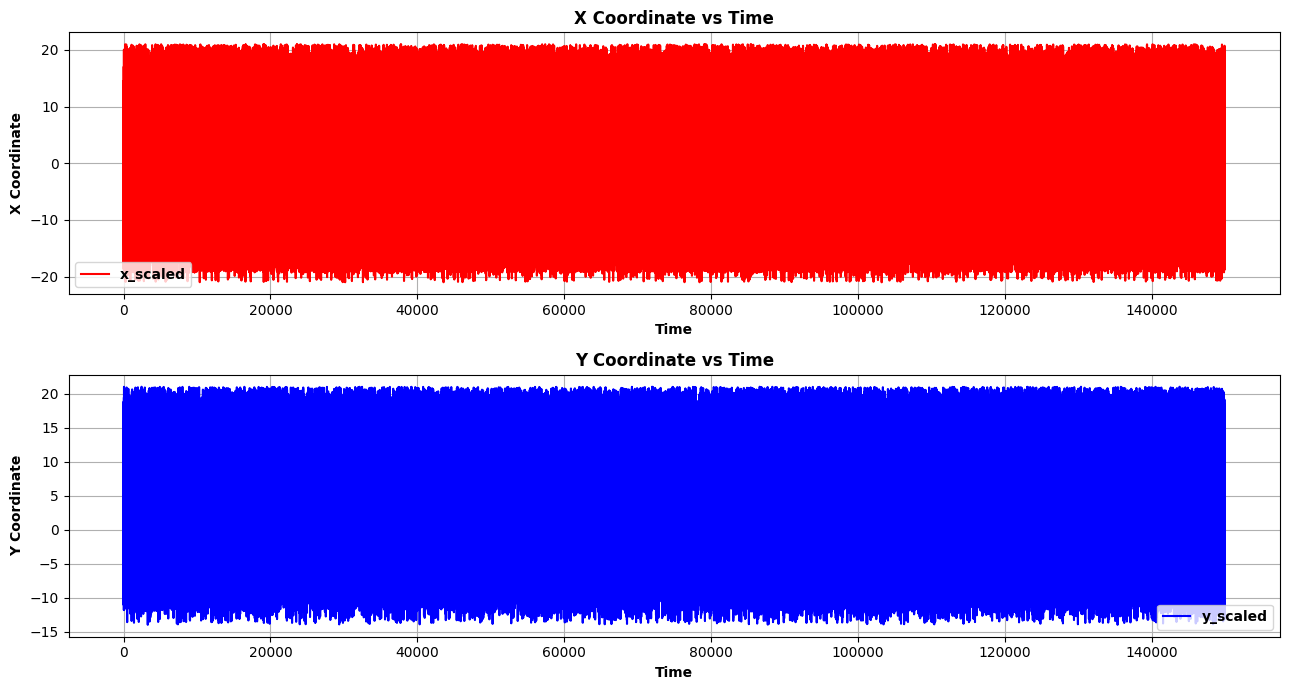

In [7]:
plot_coordinates("Three Link_Random Step Size.csv")

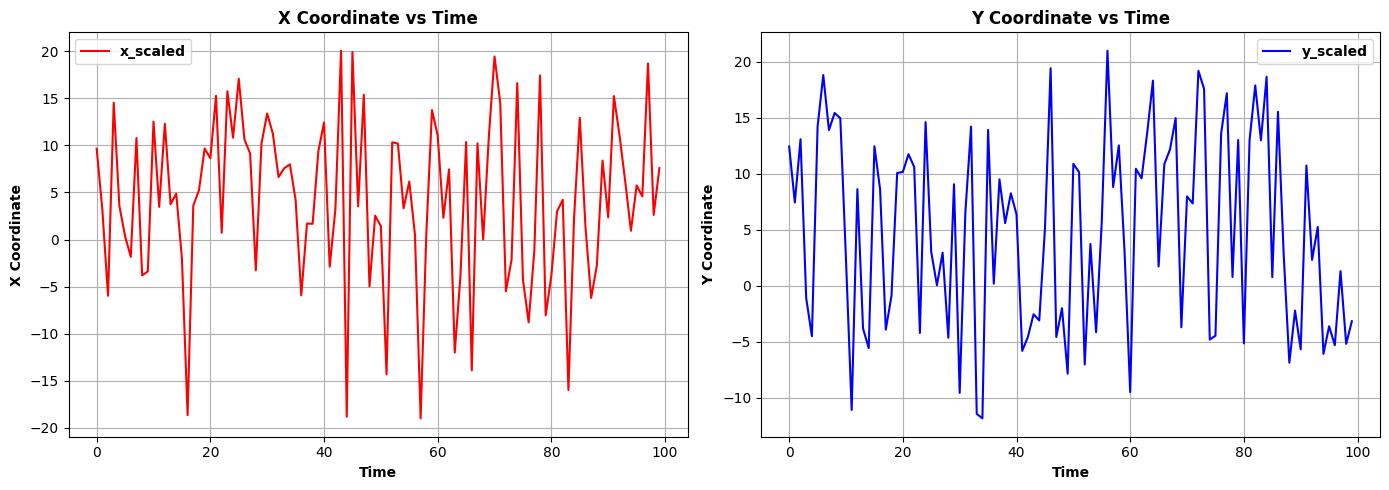

In [8]:
plot_subset_coordinates("Three Link_Random Step Size.csv")

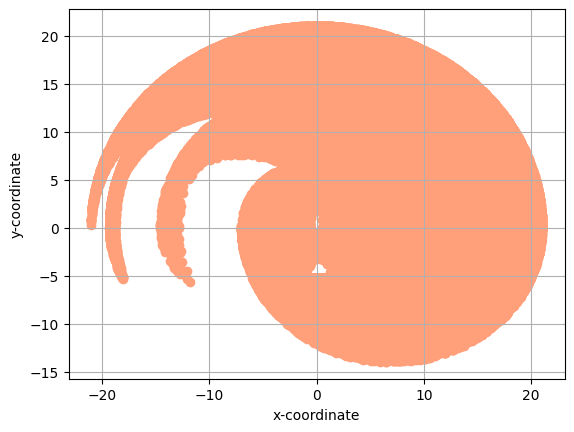

In [9]:
displayWorkSpace("Three Link_Random Step Size.csv")

In [ ]:
def fixedStepSizeDataset(target_samples=150000):
    data = fixedStepSizeData(num_samples=target_samples)

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Fixed Step Size.csv', index=False)

fixedStepSizeDataset()

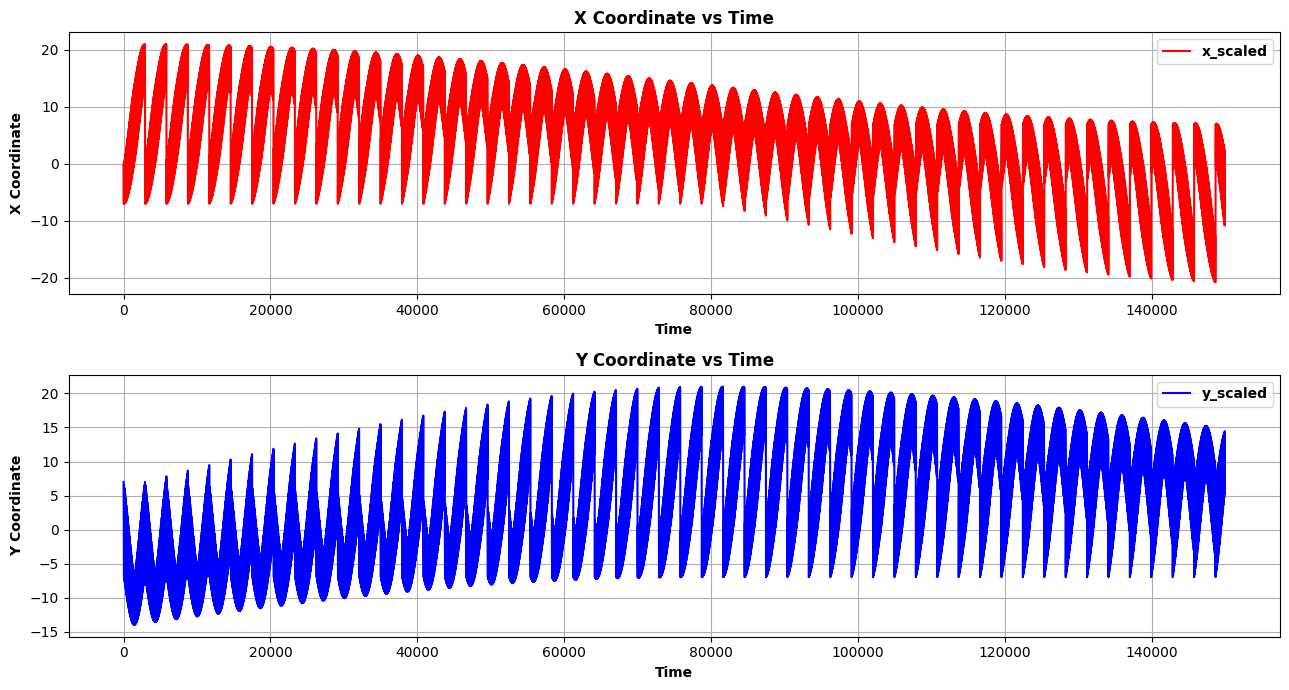

In [11]:
plot_coordinates("Three Link_Fixed Step Size.csv")

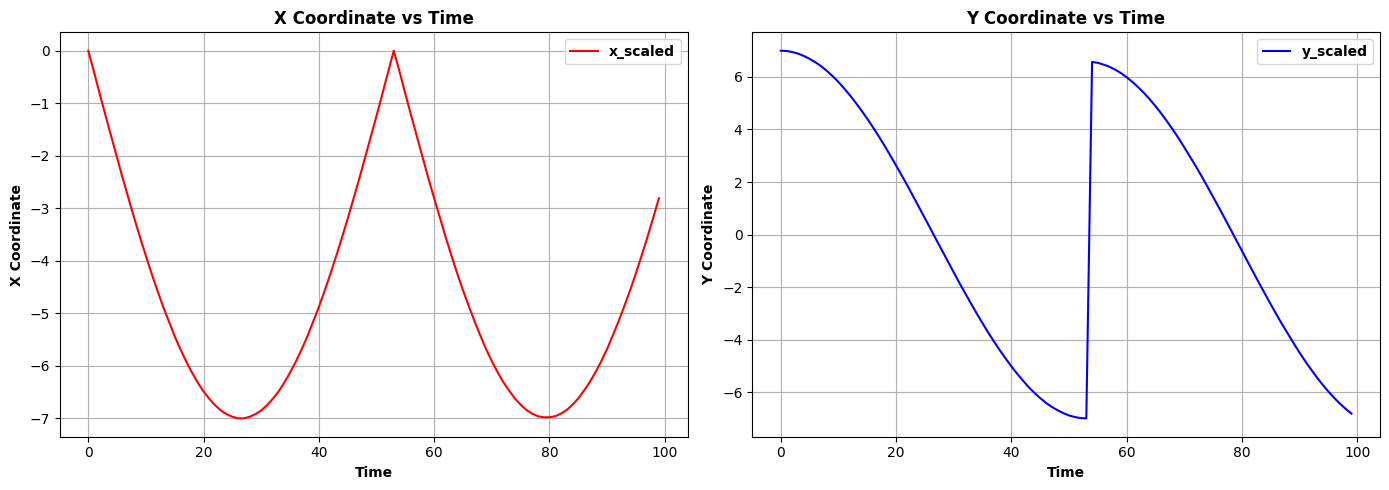

In [12]:
plot_subset_coordinates("Three Link_Fixed Step Size.csv")

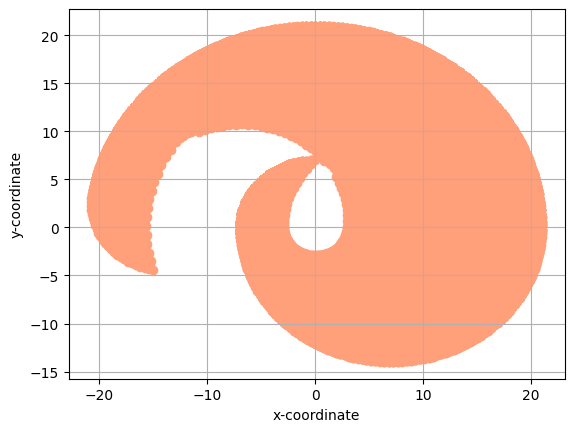

In [13]:
displayWorkSpace("Three Link_Fixed Step Size.csv")

In [ ]:
def sinusoidalTrajectoryDataset(target_samples=150000):
    data = sinusoidalTrajectoryData(num_samples=target_samples)

    df = pd.DataFrame(data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_Sinusoidal Trajectory.csv', index=False)

sinusoidalTrajectoryDataset()

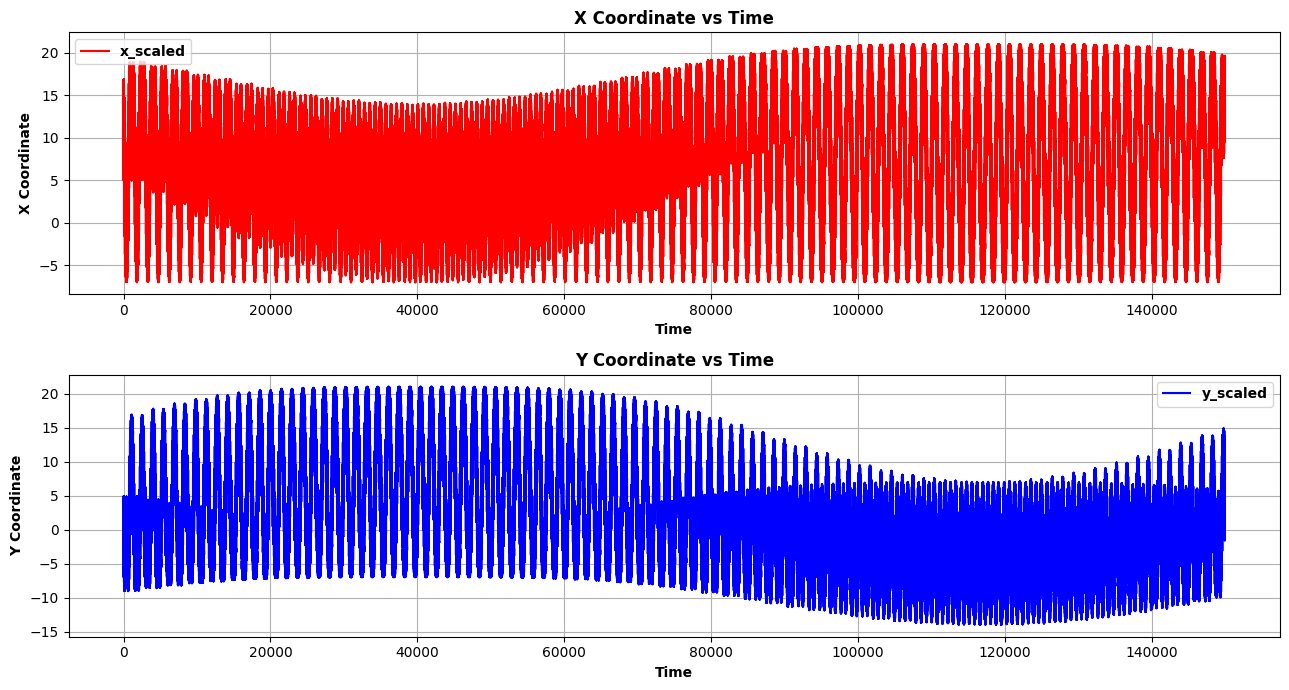

In [15]:
plot_coordinates("Three Link_Sinusoidal Trajectory.csv")

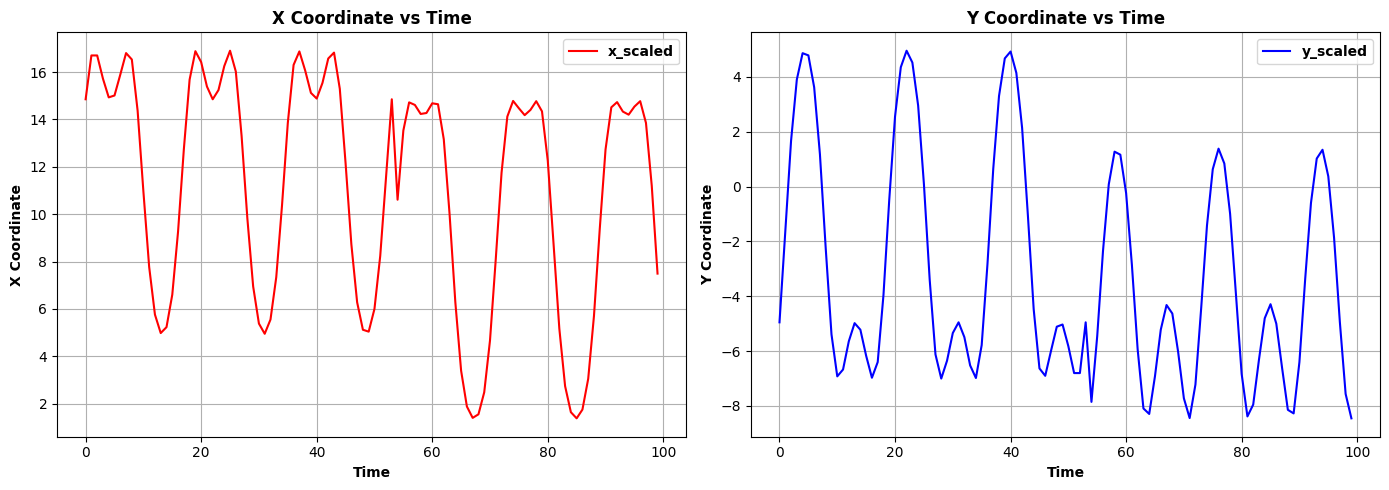

In [16]:
plot_subset_coordinates("Three Link_Sinusoidal Trajectory.csv")

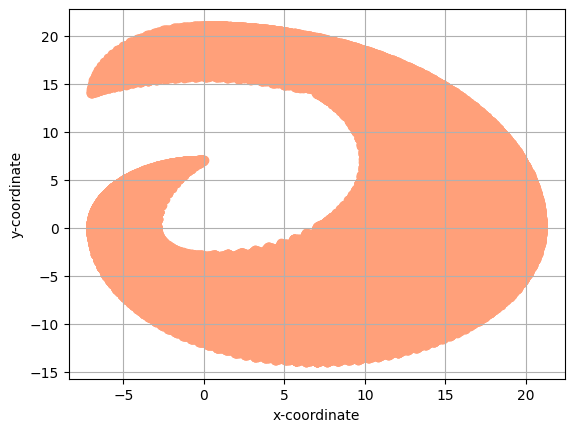

In [17]:
displayWorkSpace("Three Link_Sinusoidal Trajectory.csv")

In [7]:
def generateRandomFixedDataset(target_samples=150000):
    data_random = randomStepSizeData(num_samples=target_samples // 2)
    data_fixed = fixedStepSizeData(num_samples=target_samples // 2)
    combined_data = data_random + data_fixed

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_RandomFixed.csv', index=False)

generateRandomFixedDataset()

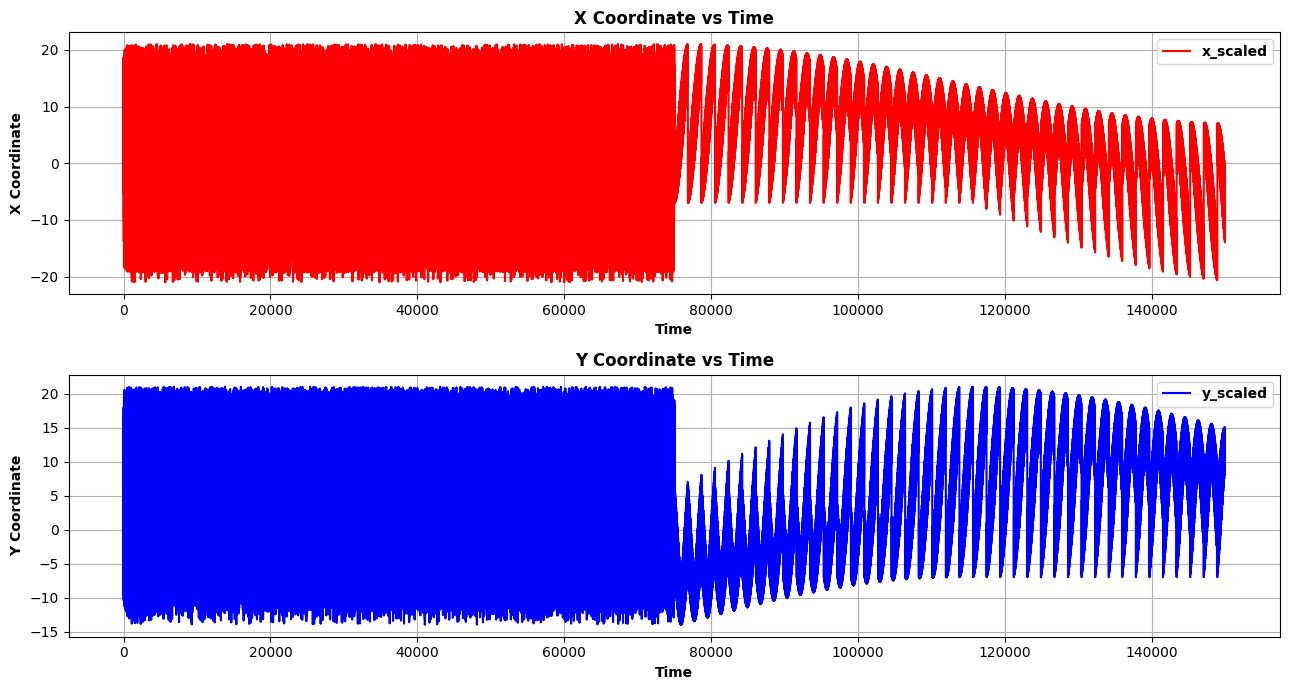

In [8]:
plot_coordinates('Three Link_RandomFixed.csv')

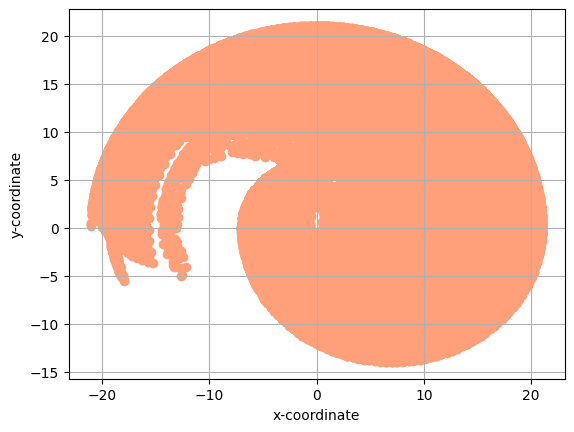

In [9]:
displayWorkSpace("Three Link_RandomFixed.csv")

In [10]:
def generateFixedSinusoidalDataset(target_samples=150000):
    data_fixed = fixedStepSizeData(num_samples=target_samples // 2)
    data_sinusoidal = sinusoidalTrajectoryData(num_samples=target_samples // 2)
    combined_data = data_fixed + data_sinusoidal

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_FixedSinusoidal.csv', index=False)

generateFixedSinusoidalDataset()

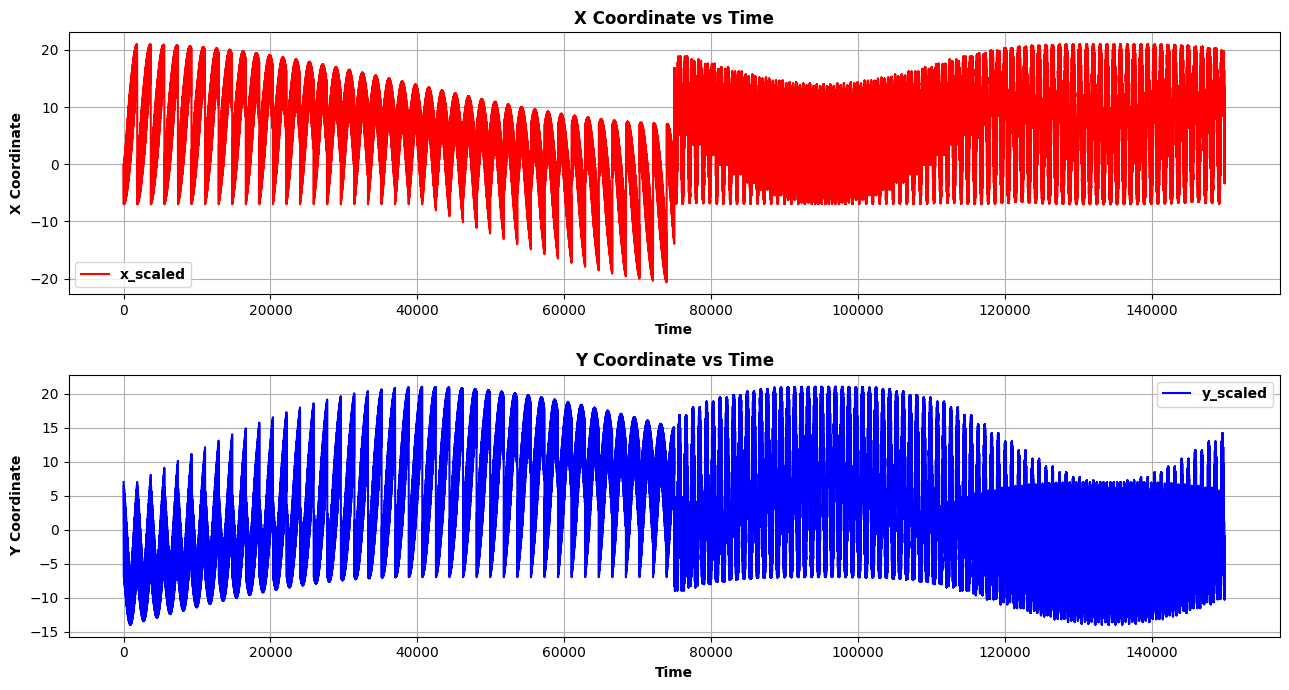

In [11]:
plot_coordinates('Three Link_FixedSinusoidal.csv')

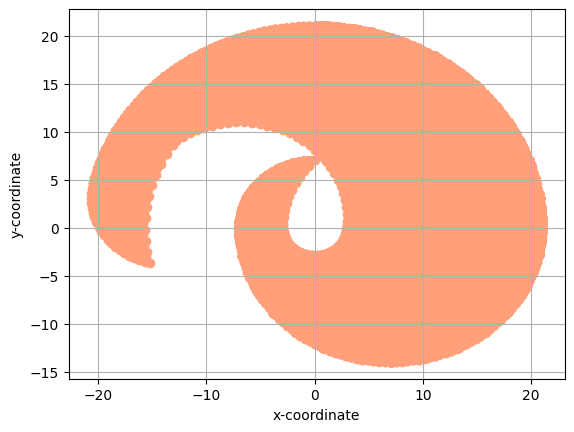

In [12]:
displayWorkSpace("Three Link_FixedSinusoidal.csv")

In [13]:
def generateSinusoidalRandomDataset(target_samples=150000):
    data_sinusoidal = sinusoidalTrajectoryData(num_samples=target_samples // 2)
    data_random = randomStepSizeData(num_samples=target_samples // 2)
    combined_data = data_sinusoidal + data_random

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_SinusoidalRandom.csv', index=False)

generateSinusoidalRandomDataset()

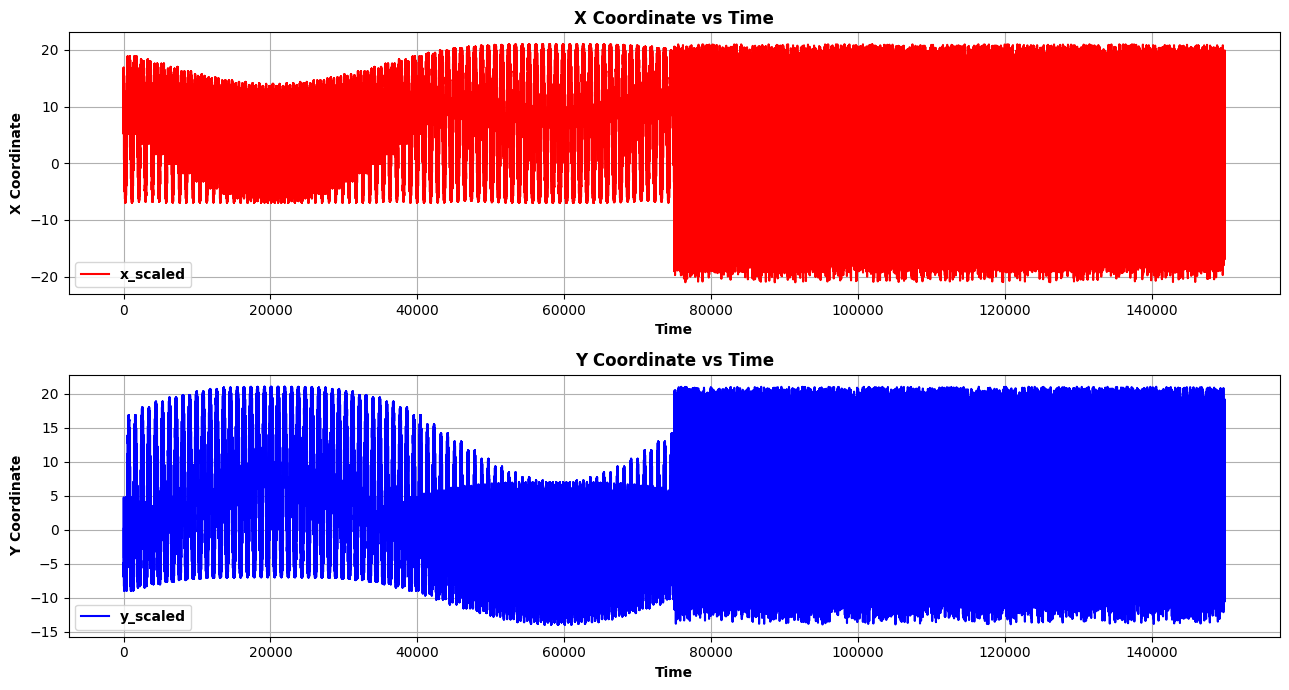

In [14]:
plot_coordinates('Three Link_SinusoidalRandom.csv')

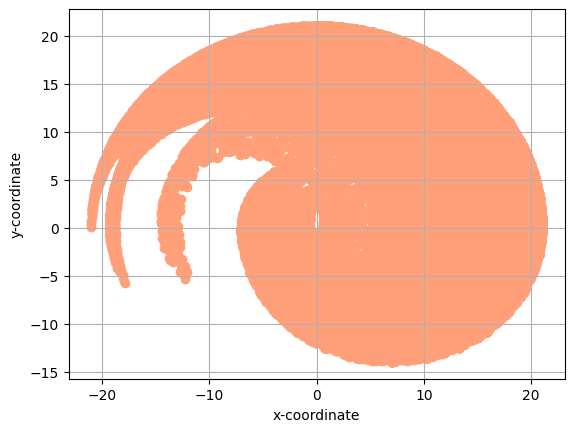

In [15]:
displayWorkSpace("Three Link_SinusoidalRandom.csv")

In [16]:
def generateRandomFixedSinusoidalDataset(target_samples=150000):
    data_random = randomStepSizeData(num_samples=target_samples // 3)
    data_fixed = fixedStepSizeData(num_samples=target_samples // 3)
    data_sinusoidal = sinusoidalTrajectoryData(num_samples=target_samples // 3)
    combined_data = data_random + data_fixed + data_sinusoidal

    df = pd.DataFrame(combined_data, columns=['x_scaled', 'y_scaled', 'theta_scaled', 'q1_estimated', 'q2_estimated', 'q3_estimated'])
    df.to_csv('Three Link_RandomFixedSinusoidal.csv', index=False)

generateRandomFixedSinusoidalDataset()

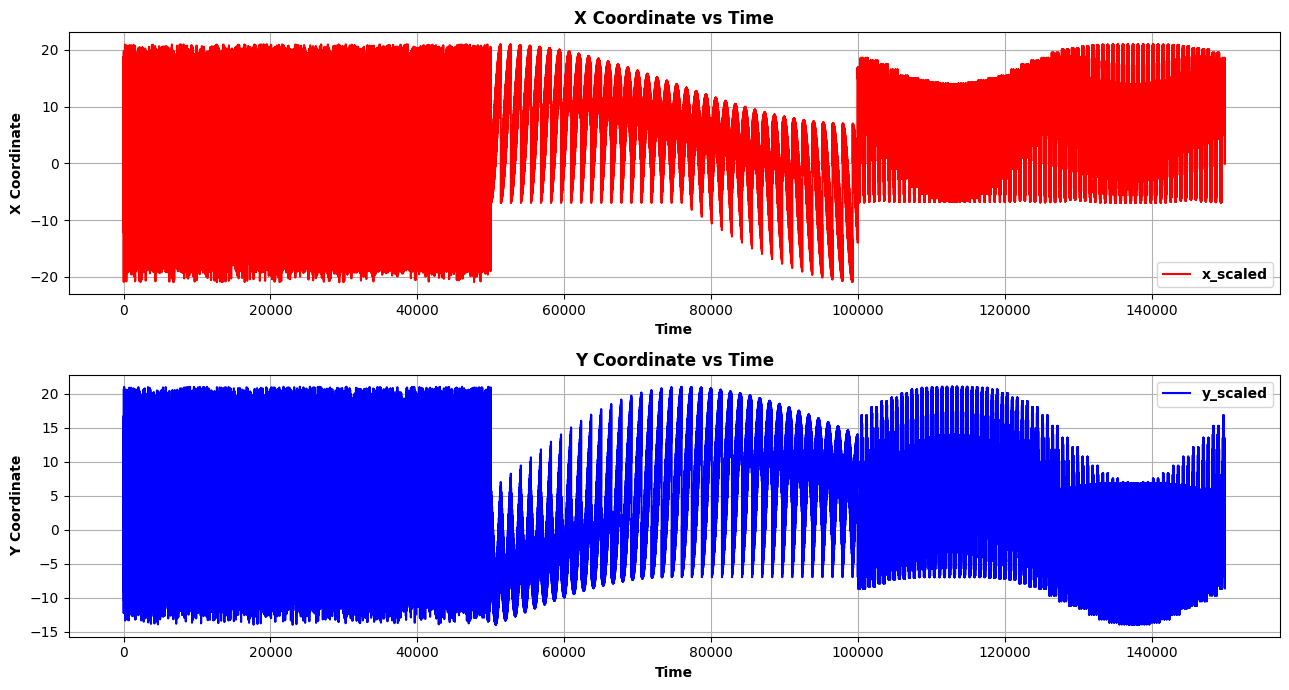

In [17]:
plot_coordinates('Three Link_RandomFixedSinusoidal.csv')

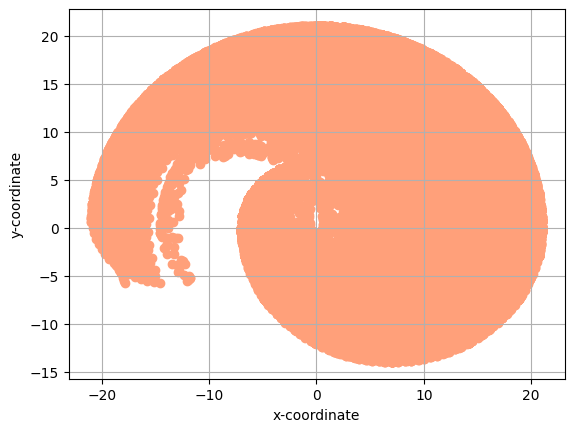

In [18]:
displayWorkSpace("Three Link_RandomFixedSinusoidal.csv")

In [19]:
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].plot(history.history['accuracy'])
    axes[0].plot(history.history['val_accuracy'])
    axes[0].set_title('Model Accuracy', weight='bold')
    axes[0].set_ylabel('Accuracy', weight='bold')
    axes[0].set_xlabel('Epoch', weight='bold')
    axes[0].legend(['Train', 'Validation'], loc='lower right', prop={'weight': 'bold'})

    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('Model Loss', weight='bold')
    axes[1].set_ylabel('Loss', weight='bold')
    axes[1].set_xlabel('Epoch', weight='bold')
    axes[1].legend(['Train', 'Validation'], loc='upper right', prop={'weight': 'bold'})

    plt.tight_layout()
    plt.show()

Models

In [20]:
def ann(input_dim=3, output_dim=3, optimizer='adam'):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(units=3, kernel_initializer='uniform'),
        Dense(units=100, kernel_initializer='uniform', activation='relu'),
        Dense(units=100, kernel_initializer='uniform', activation='relu'),
        Dense(units=output_dim, kernel_initializer='uniform', activation='linear')
    ])

    optimizers = {
        'adam': tf.keras.optimizers.Adam(learning_rate=0.001),
        'adamw': tf.keras.optimizers.AdamW(learning_rate=0.0003, weight_decay=0.006),
        'adadelta': tf.keras.optimizers.Adadelta(learning_rate=0.2),
        'adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.02),
        'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=0.0001),
        'sgd': tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.8),
    }

    optimizer_choice = optimizers.get(optimizer.lower())

    model.compile(optimizer=optimizer_choice,
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['accuracy'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Random Sampling

In [32]:
data_Random = pd.read_csv('Three Link_Random Step Size.csv')

x_Random = data_Random.iloc[:, 0:3].values
y_Random = data_Random.iloc[:, 3:].values
x_train_Random, x_test_Random, y_train_Random, y_test_Random = train_test_split(x_Random, y_Random, test_size = 0.20)

In [40]:
ann_adam_Random = ann(optimizer='adam')
ann_adam_Random.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history_ann_adam_Random = ann_adam_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9133 - loss: 0.3758 - val_accuracy: 0.9572 - val_loss: 0.0450
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9654 - loss: 0.0333 - val_accuracy: 0.9753 - val_loss: 0.0222
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9735 - loss: 0.0230 - val_accuracy: 0.9757 - val_loss: 0.0179
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9773 - loss: 0.0198 - val_accuracy: 0.9842 - val_loss: 0.0236
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9796 - loss: 0.0176 - val_accuracy: 0.9730 - val_loss: 0.0167
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9821 - loss: 0.0166 - val_accuracy: 0.9799 - val_loss: 0.0301
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9832 - loss: 0.0158 - val_accuracy: 0.9865 - val_loss: 0.0121
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9835 - l

In [42]:
test_loss_ann_adam_Random, test_acc_ann_adam_Random = ann_adam_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Random)
print('Testing Accuracy :', test_acc_ann_adam_Random)

938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9840 - loss: 0.0098
Testing the Model :
Testing Loss : 0.009534408338367939
Testing Accuracy : 0.9838333129882812


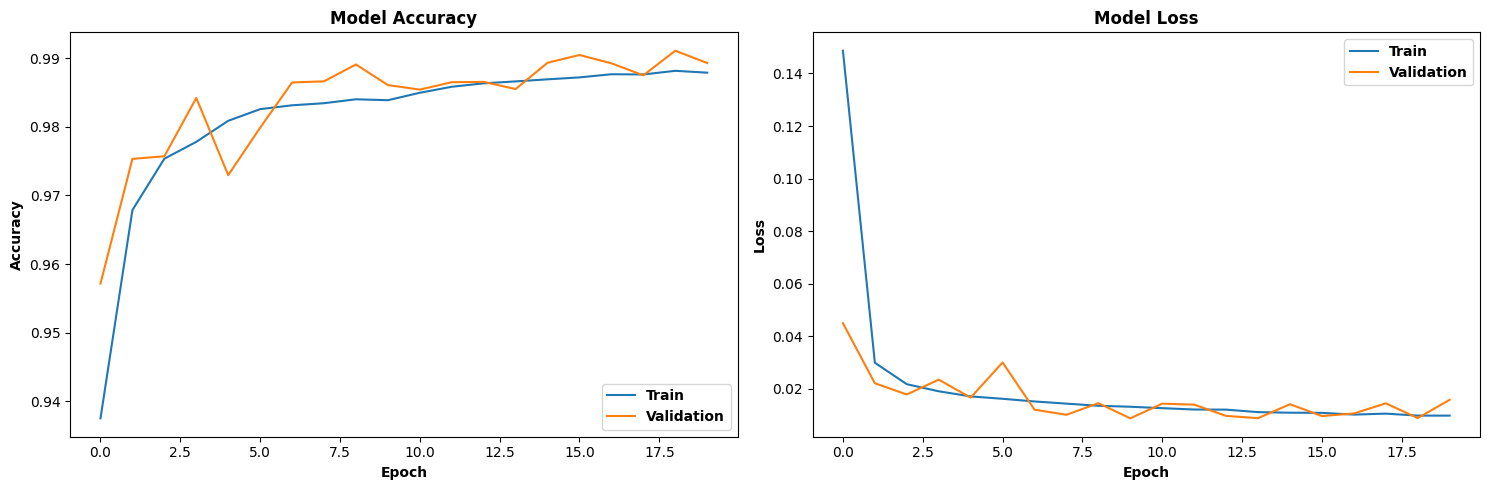

In [43]:
plot_training_history(history_ann_adam_Random)

In [44]:
ann_adamw_Random = ann(optimizer='adamw')
ann_adamw_Random.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history_ann_adamw_Random = ann_adamw_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8903 - loss: 0.6717 - val_accuracy: 0.9441 - val_loss: 0.0563
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9444 - loss: 0.0496 - val_accuracy: 0.9605 - val_loss: 0.0360
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9601 - loss: 0.0334 - val_accuracy: 0.9563 - val_loss: 0.0294
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9620 - loss: 0.0281 - val_accuracy: 0.9695 - val_loss: 0.0222
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9656 - loss: 0.0237 - val_accuracy: 0.9747 - val_loss: 0.0199
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9699 - loss: 0.0201 - val_accuracy: 0.9743 - val_loss: 0.0202
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9738 - loss: 0.0180 - val_accuracy: 0.9740 - val_loss: 0.0175
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9747 - los

In [46]:
test_loss_ann_adamw_Random, test_acc_ann_adamw_Random = ann_adamw_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Random)
print('Testing Accuracy :', test_acc_ann_adamw_Random)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9813 - loss: 0.0086
Testing the Model :
Testing Loss : 0.008266294375061989
Testing Accuracy : 0.981333315372467


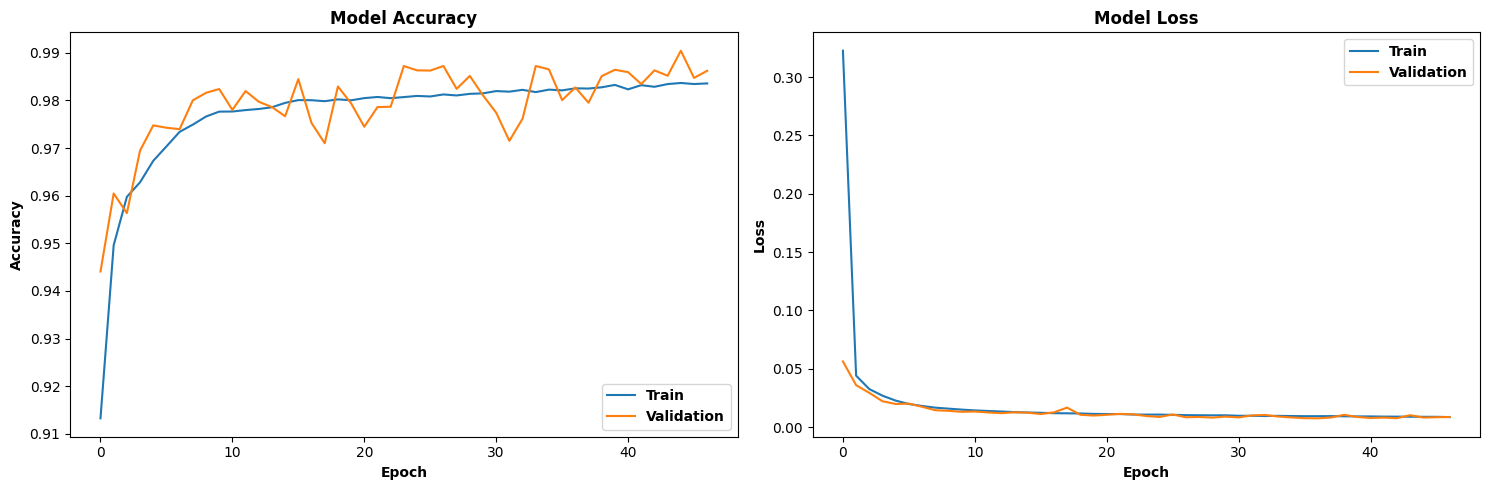

In [47]:
plot_training_history(history_ann_adamw_Random)

In [48]:
ann_adadelta_Random = ann(optimizer='adadelta')
ann_adadelta_Random.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history_ann_adadelta_Random = ann_adadelta_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8948 - loss: 0.5340 - val_accuracy: 0.9527 - val_loss: 0.0460
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9532 - loss: 0.0420 - val_accuracy: 0.9696 - val_loss: 0.0271
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9672 - loss: 0.0283 - val_accuracy: 0.9732 - val_loss: 0.0225
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9724 - loss: 0.0229 - val_accuracy: 0.9783 - val_loss: 0.0176
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9747 - loss: 0.0200 - val_accuracy: 0.9767 - val_loss: 0.0169
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9762 - loss: 0.0173 - val_accuracy: 0.9818 - val_loss: 0.0132
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9800 - loss: 0.0155 - val_accuracy: 0.9803 - val_loss: 0.0218
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9819 - lo

In [50]:
test_loss_ann_adadelta_Random, test_acc_ann_adadelta_Random = ann_adadelta_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Random)
print('Testing Accuracy :', test_acc_ann_adadelta_Random)

938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9921 - loss: 0.0045
Testing the Model :
Testing Loss : 0.0042282044887542725
Testing Accuracy : 0.9917666912078857


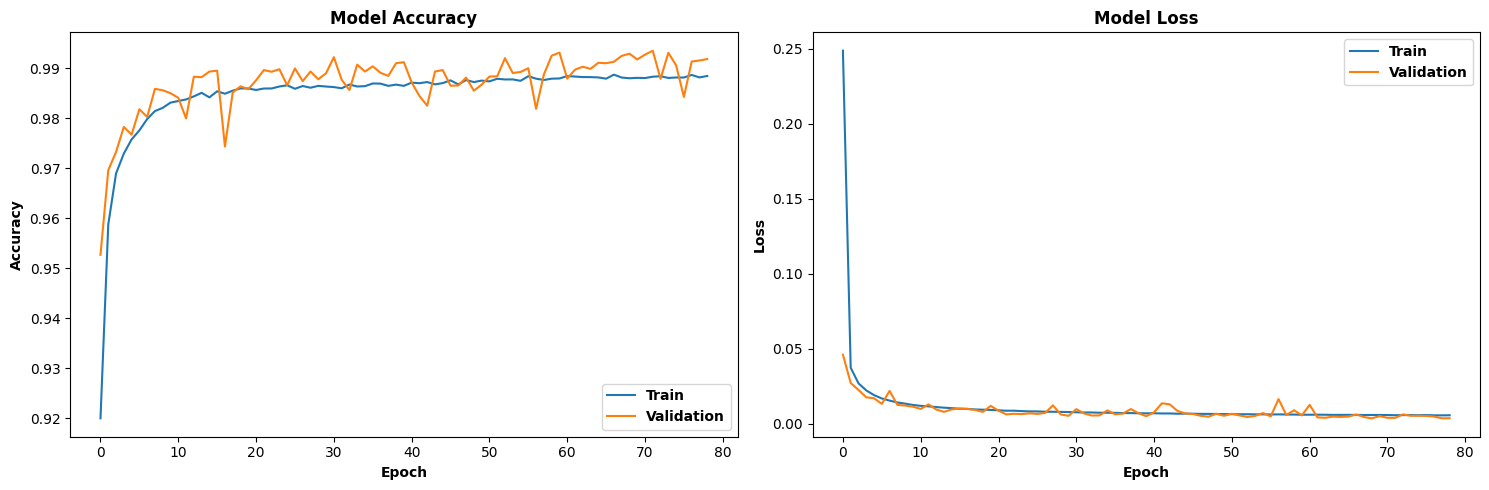

In [51]:
plot_training_history(history_ann_adadelta_Random)

In [52]:
ann_adagrad_Random = ann(optimizer='adagrad')
ann_adagrad_Random.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history_ann_adagrad_Random = ann_adagrad_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9032 - loss: 0.4135 - val_accuracy: 0.9481 - val_loss: 0.0443
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9524 - loss: 0.0369 - val_accuracy: 0.9690 - val_loss: 0.0250
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9705 - loss: 0.0229 - val_accuracy: 0.9768 - val_loss: 0.0220
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9765 - loss: 0.0181 - val_accuracy: 0.9806 - val_loss: 0.0163
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9798 - loss: 0.0157 - val_accuracy: 0.9815 - val_loss: 0.0130
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9830 - loss: 0.0144 - val_accuracy: 0.9835 - val_loss: 0.0124
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9850 - loss: 0.0122 - val_accuracy: 0.9830 - val_loss: 0.0136
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9858 - lo

In [54]:
test_loss_ann_adagrad_Random, test_acc_ann_adagrad_Random = ann_adagrad_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Random)
print('Testing Accuracy :', test_acc_ann_adagrad_Random)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9931 - loss: 0.0032
Testing the Model :
Testing Loss : 0.003099648980423808
Testing Accuracy : 0.9926999807357788


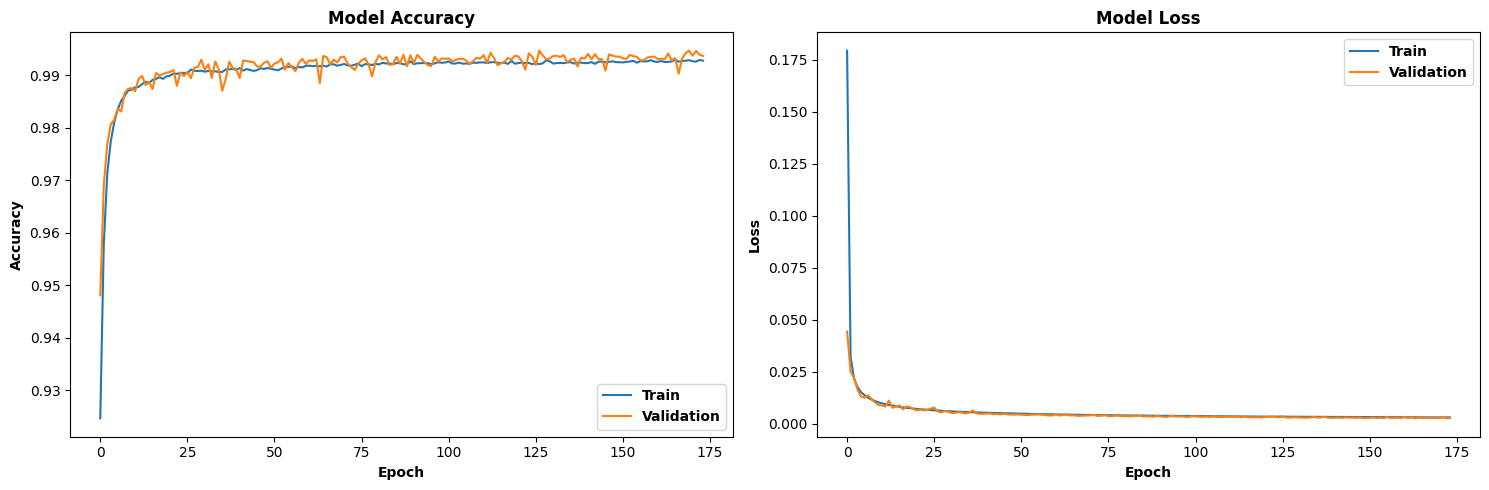

In [55]:
plot_training_history(history_ann_adagrad_Random)

In [56]:
ann_rmsprop_Random = ann(optimizer='rmsprop')
ann_rmsprop_Random.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history_ann_rmsprop_Random = ann_rmsprop_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8765 - loss: 1.0983 - val_accuracy: 0.8979 - val_loss: 0.3073
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9060 - loss: 0.2428 - val_accuracy: 0.9355 - val_loss: 0.0921
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9343 - loss: 0.0797 - val_accuracy: 0.9455 - val_loss: 0.0532
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9469 - loss: 0.0487 - val_accuracy: 0.9565 - val_loss: 0.0368
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9539 - loss: 0.0374 - val_accuracy: 0.9582 - val_loss: 0.0310
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9581 - loss: 0.0314 - val_accuracy: 0.9655 - val_loss: 0.0284
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9620 - loss: 0.0280 - val_accuracy: 0.9684 - val_loss: 0.0252
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9648 - los

In [58]:
test_loss_ann_rmsprop_Random, test_acc_ann_rmsprop_Random = ann_rmsprop_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Random)
print('Testing Accuracy :', test_acc_ann_rmsprop_Random)

938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9908 - loss: 0.0070
Testing the Model :
Testing Loss : 0.006728657986968756
Testing Accuracy : 0.9904000163078308


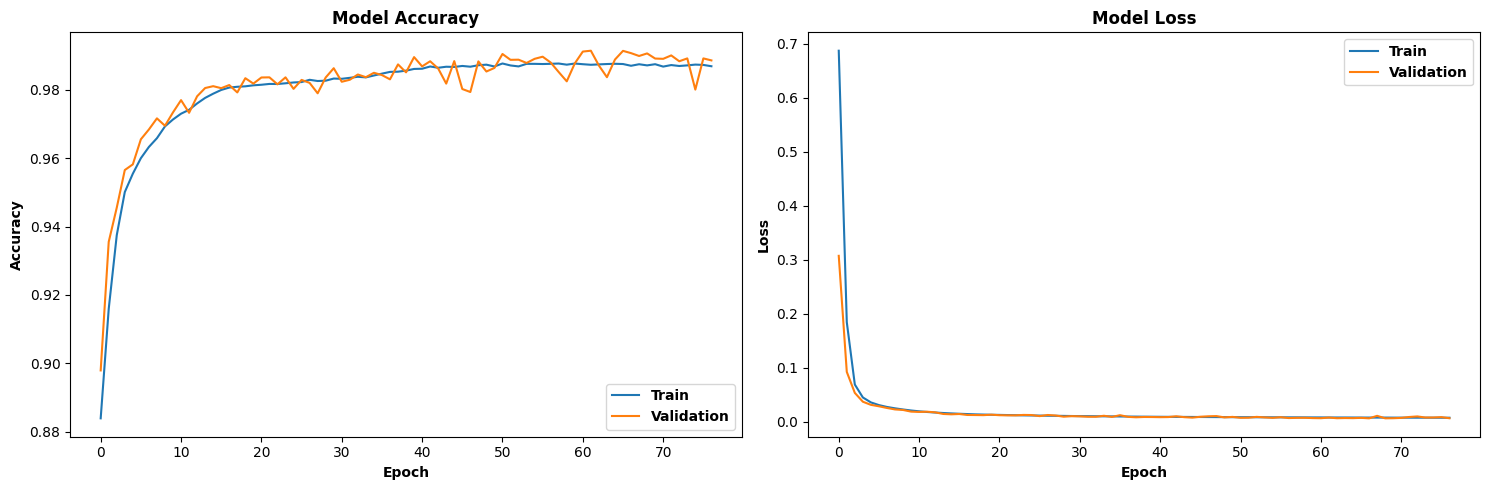

In [59]:
plot_training_history(history_ann_rmsprop_Random)

In [60]:
ann_sgd_Random = ann(optimizer='sgd')
ann_sgd_Random.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history_ann_sgd_Random = ann_sgd_Random.fit(x_train_Random, y_train_Random, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8813 - loss: 0.8374 - val_accuracy: 0.9160 - val_loss: 0.3886
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9169 - loss: 0.3547 - val_accuracy: 0.9164 - val_loss: 0.1968
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9123 - loss: 0.1507 - val_accuracy: 0.9250 - val_loss: 0.0815
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9268 - loss: 0.0775 - val_accuracy: 0.9355 - val_loss: 0.0740
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9305 - loss: 0.0655 - val_accuracy: 0.9388 - val_loss: 0.0605
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9337 - loss: 0.0581 - val_accuracy: 0.9342 - val_loss: 0.0619
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9347 - loss: 0.0528 - val_accuracy: 0.9404 - val_loss: 0.0482
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9387 - los

In [62]:
test_loss_ann_sgd_Random, test_acc_ann_sgd_Random = ann_sgd_Random.evaluate(x_test_Random, y_test_Random)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Random)
print('Testing Accuracy :', test_acc_ann_sgd_Random)

938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9836 - loss: 0.0099
Testing the Model :
Testing Loss : 0.00935717485845089
Testing Accuracy : 0.9826666712760925


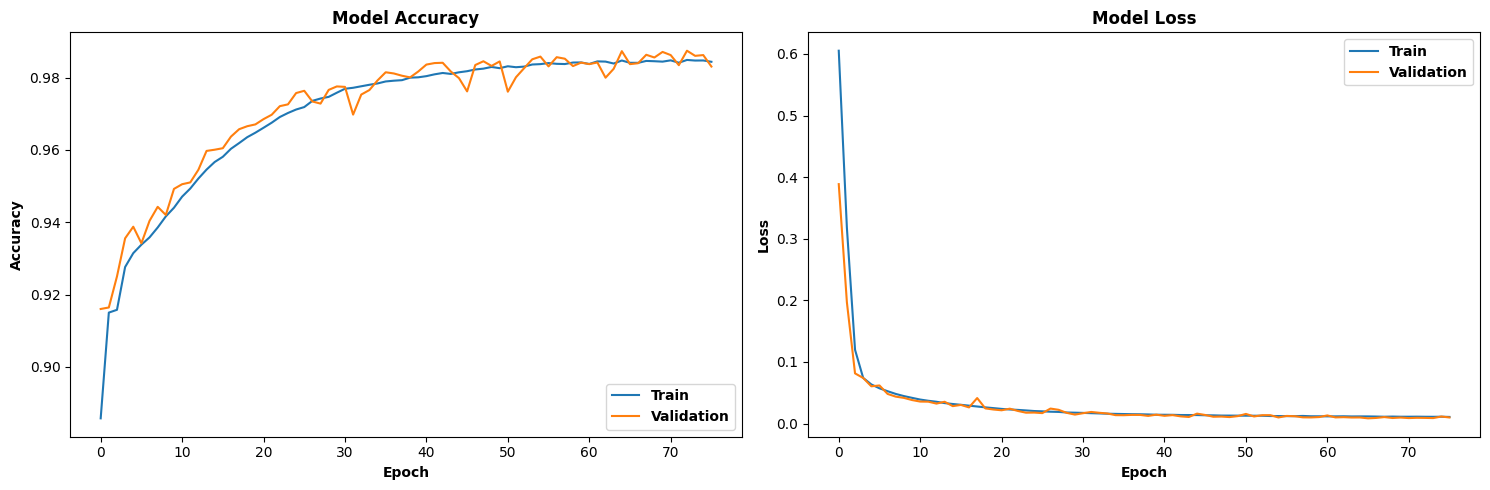

In [63]:
plot_training_history(history_ann_sgd_Random)

Fixed Step Size

In [64]:
data_Fixed = pd.read_csv('Three Link_Fixed Step Size.csv')

x_Fixed = data_Fixed.iloc[:, 0:3].values
y_Fixed = data_Fixed.iloc[:, 3:].values
x_train_Fixed, x_test_Fixed, y_train_Fixed, y_test_Fixed = train_test_split(x_Fixed, y_Fixed, test_size = 0.20)

In [65]:
ann_adam_Fixed = ann(optimizer='adam')
ann_adam_Fixed.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history_ann_adam_Fixed = ann_adam_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9035 - loss: 0.4170 - val_accuracy: 0.9650 - val_loss: 0.0392
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9625 - loss: 0.0385 - val_accuracy: 0.9679 - val_loss: 0.0291
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9642 - loss: 0.0305 - val_accuracy: 0.9681 - val_loss: 0.0250
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9672 - loss: 0.0284 - val_accuracy: 0.9682 - val_loss: 0.0201
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9687 - loss: 0.0260 - val_accuracy: 0.9570 - val_loss: 0.0248
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9711 - loss: 0.0239 - val_accuracy: 0.9703 - val_loss: 0.0224
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9725 - loss: 0.0231 - val_accuracy: 0.9717 - val_loss: 0.0226
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9715 - loss

In [67]:
test_loss_ann_adam_Fixed, test_acc_ann_adam_Fixed = ann_adam_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Fixed)
print('Testing Accuracy :', test_acc_ann_adam_Fixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0118
Testing the Model :
Testing Loss : 0.011962039396166801
Testing Accuracy : 0.9870333075523376


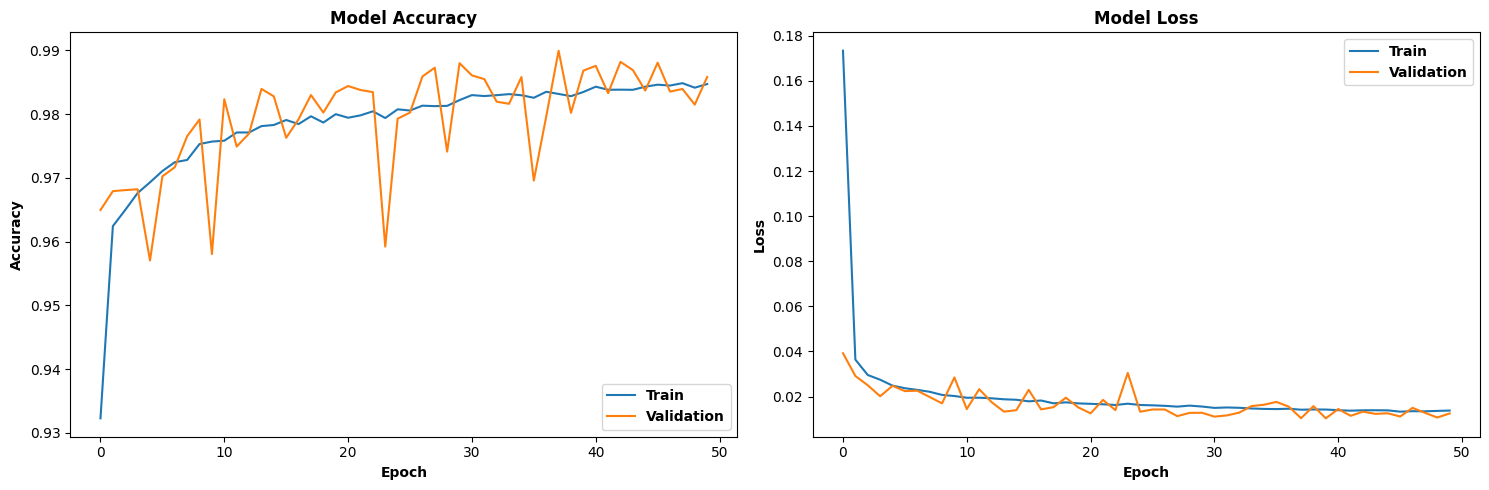

In [68]:
plot_training_history(history_ann_adam_Fixed)

In [69]:
ann_adamw_Fixed = ann(optimizer='adamw')
ann_adamw_Fixed.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history_ann_adamw_Fixed = ann_adamw_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8795 - loss: 0.6755 - val_accuracy: 0.9378 - val_loss: 0.0564
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9475 - loss: 0.0502 - val_accuracy: 0.9608 - val_loss: 0.0368
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9623 - loss: 0.0356 - val_accuracy: 0.9626 - val_loss: 0.0282
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9652 - loss: 0.0285 - val_accuracy: 0.9748 - val_loss: 0.0219
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9689 - loss: 0.0246 - val_accuracy: 0.9707 - val_loss: 0.0203
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9713 - loss: 0.0226 - val_accuracy: 0.9738 - val_loss: 0.0204
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9725 - loss: 0.0212 - val_accuracy: 0.9592 - val_loss: 0.0299
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9720 - lo

In [71]:
test_loss_ann_adamw_Fixed, test_acc_ann_adamw_Fixed = ann_adamw_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Fixed)
print('Testing Accuracy :', test_acc_ann_adamw_Fixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9817 - loss: 0.0121
Testing the Model :
Testing Loss : 0.012396784499287605
Testing Accuracy : 0.9814333319664001


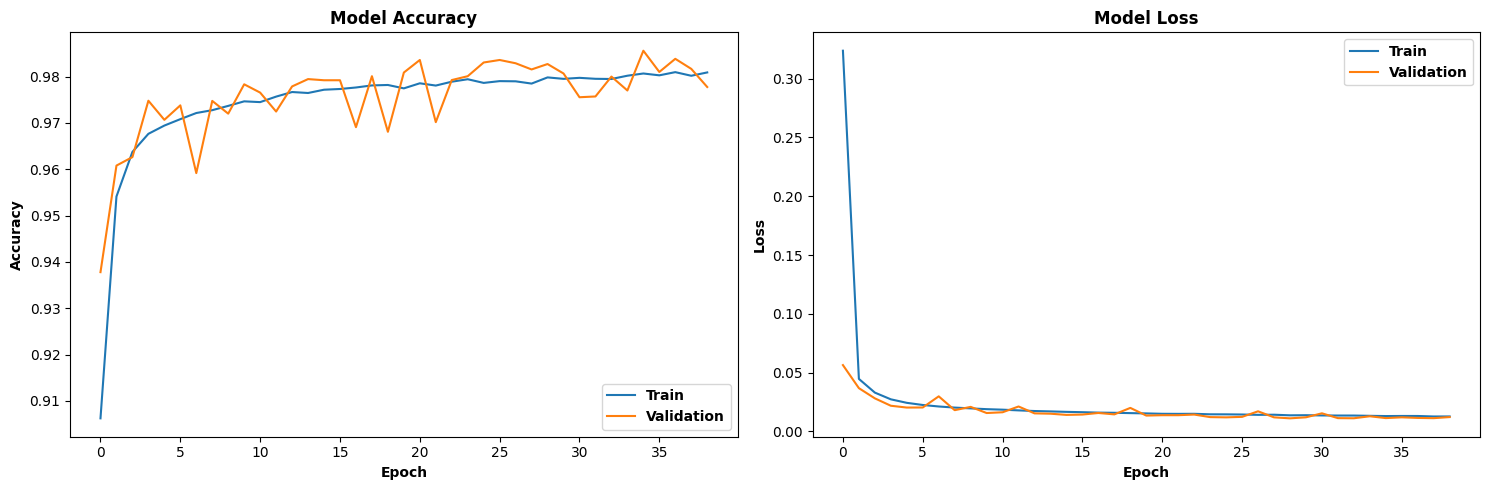

In [72]:
plot_training_history(history_ann_adamw_Fixed)

In [73]:
ann_adadelta_Fixed = ann(optimizer='adadelta')
ann_adadelta_Fixed.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history_ann_adadelta_Fixed = ann_adadelta_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8781 - loss: 0.5600 - val_accuracy: 0.9543 - val_loss: 0.0560
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9574 - loss: 0.0504 - val_accuracy: 0.9691 - val_loss: 0.0350
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9678 - loss: 0.0344 - val_accuracy: 0.9747 - val_loss: 0.0244
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9738 - loss: 0.0271 - val_accuracy: 0.9789 - val_loss: 0.0218
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9774 - loss: 0.0233 - val_accuracy: 0.9778 - val_loss: 0.0199
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9782 - loss: 0.0215 - val_accuracy: 0.9815 - val_loss: 0.0165
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9800 - loss: 0.0195 - val_accuracy: 0.9798 - val_loss: 0.0194
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9799 - loss

In [75]:
test_loss_ann_adadelta_Fixed, test_acc_ann_adadelta_Fixed = ann_adadelta_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Fixed)
print('Testing Accuracy :', test_acc_ann_adadelta_Fixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0093
Testing the Model :
Testing Loss : 0.00952207576483488
Testing Accuracy : 0.9901999831199646


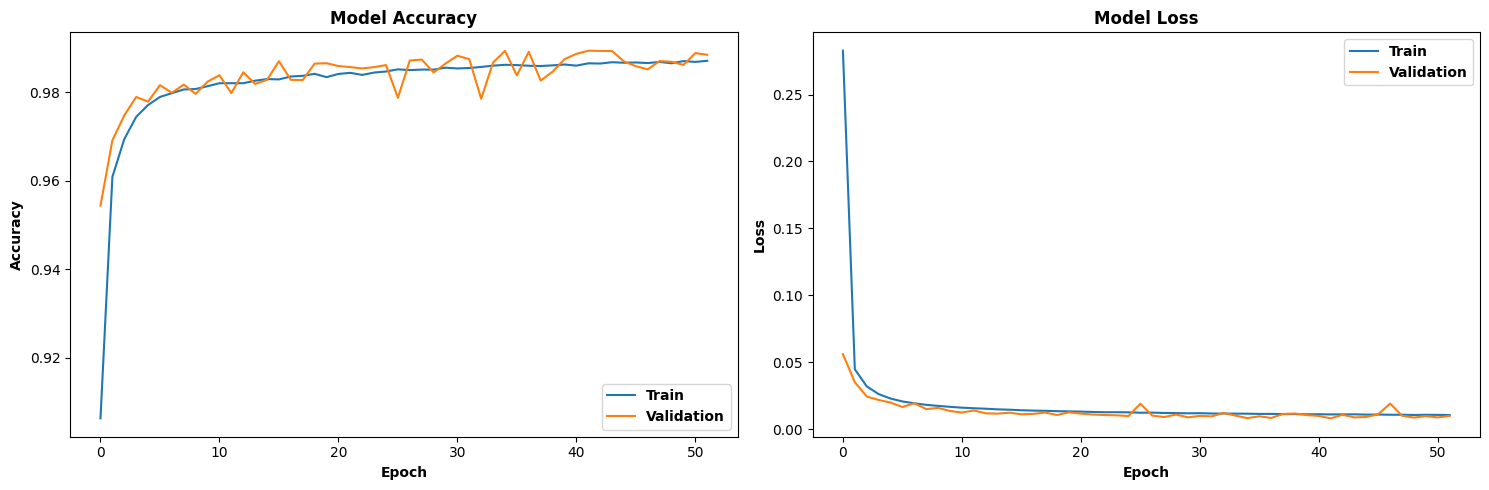

In [76]:
plot_training_history(history_ann_adadelta_Fixed)

In [77]:
ann_adagrad_Fixed = ann(optimizer='adagrad')
ann_adagrad_Fixed.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
history_ann_adagrad_Fixed = ann_adagrad_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8907 - loss: 0.4108 - val_accuracy: 0.9573 - val_loss: 0.0425
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9610 - loss: 0.0390 - val_accuracy: 0.9718 - val_loss: 0.0287
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9739 - loss: 0.0276 - val_accuracy: 0.9794 - val_loss: 0.0225
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9785 - loss: 0.0225 - val_accuracy: 0.9798 - val_loss: 0.0198
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9806 - loss: 0.0195 - val_accuracy: 0.9822 - val_loss: 0.0168
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9820 - loss: 0.0182 - val_accuracy: 0.9827 - val_loss: 0.0208
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9832 - loss: 0.0169 - val_accuracy: 0.9852 - val_loss: 0.0139
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9833 - lo

In [79]:
test_loss_ann_adagrad_Fixed, test_acc_ann_adagrad_Fixed = ann_adagrad_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Fixed)
print('Testing Accuracy :', test_acc_ann_adagrad_Fixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9924 - loss: 0.0075
Testing the Model :
Testing Loss : 0.007835060358047485
Testing Accuracy : 0.9916333556175232


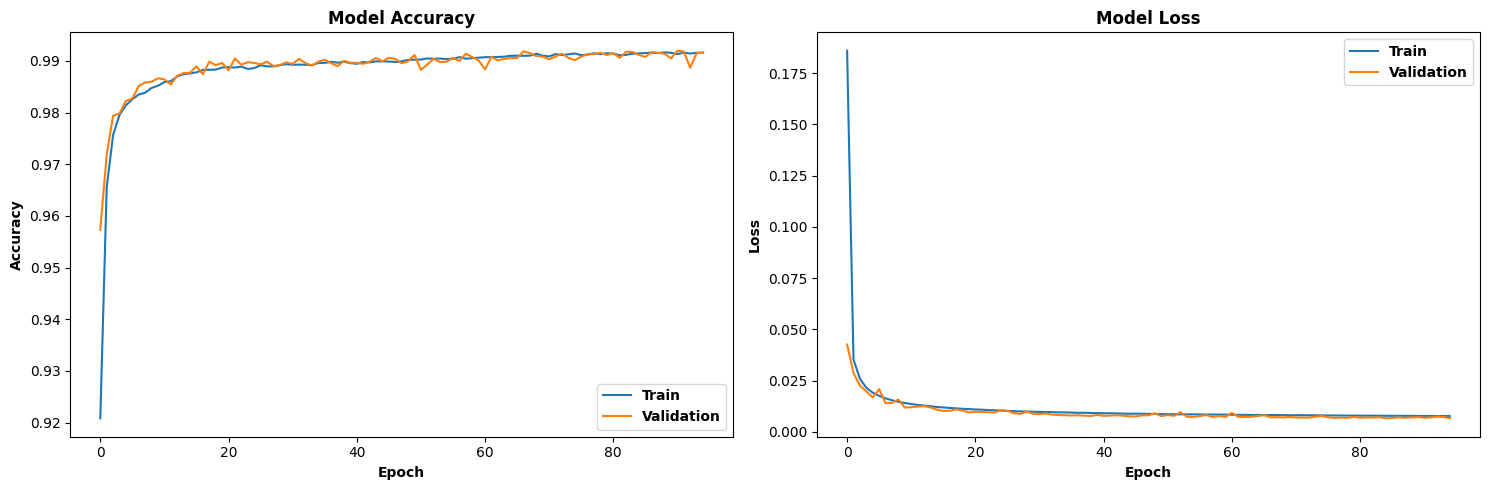

In [80]:
plot_training_history(history_ann_adagrad_Fixed)

In [81]:
ann_rmsprop_Fixed = ann(optimizer='rmsprop')
ann_rmsprop_Fixed.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history_ann_rmsprop_Fixed = ann_rmsprop_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8576 - loss: 1.0534 - val_accuracy: 0.9018 - val_loss: 0.2887
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9054 - loss: 0.2257 - val_accuracy: 0.9261 - val_loss: 0.0934
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9291 - loss: 0.0845 - val_accuracy: 0.9395 - val_loss: 0.0576
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9435 - loss: 0.0556 - val_accuracy: 0.9536 - val_loss: 0.0441
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9549 - loss: 0.0439 - val_accuracy: 0.9632 - val_loss: 0.0371
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9618 - loss: 0.0371 - val_accuracy: 0.9657 - val_loss: 0.0321
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9670 - loss: 0.0330 - val_accuracy: 0.9697 - val_loss: 0.0296
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9669 - lo

In [83]:
test_loss_ann_rmsprop_Fixed, test_acc_ann_rmsprop_Fixed = ann_rmsprop_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Fixed)
print('Testing Accuracy :', test_acc_ann_rmsprop_Fixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9832 - loss: 0.0115
Testing the Model :
Testing Loss : 0.011756258085370064
Testing Accuracy : 0.9827333092689514


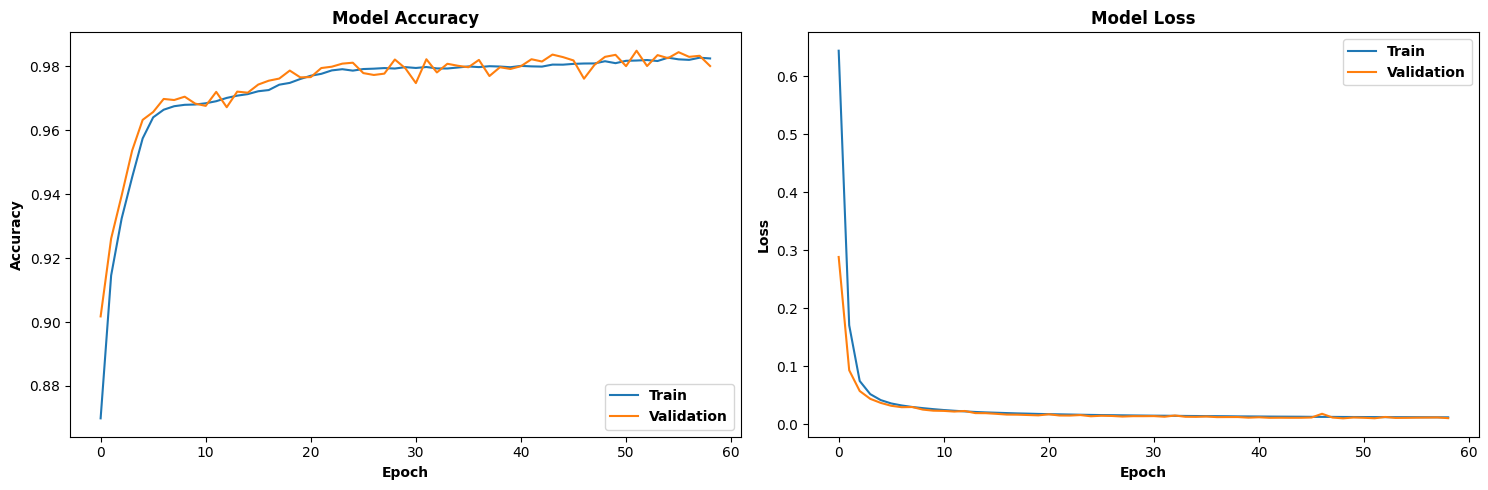

In [84]:
plot_training_history(history_ann_rmsprop_Fixed)

In [85]:
ann_sgd_Fixed = ann(optimizer='sgd')
ann_sgd_Fixed.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
history_ann_sgd_Fixed = ann_sgd_Fixed.fit(x_train_Fixed, y_train_Fixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8625 - loss: 0.8356 - val_accuracy: 0.8639 - val_loss: 0.5223
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8776 - loss: 0.4420 - val_accuracy: 0.8999 - val_loss: 0.3287
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9014 - loss: 0.2557 - val_accuracy: 0.9095 - val_loss: 0.1069
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9190 - loss: 0.0867 - val_accuracy: 0.9297 - val_loss: 0.0662
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9310 - loss: 0.0692 - val_accuracy: 0.9324 - val_loss: 0.0598
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9344 - loss: 0.0630 - val_accuracy: 0.9383 - val_loss: 0.0537
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9385 - loss: 0.0571 - val_accuracy: 0.9435 - val_loss: 0.0539
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9432 - los

In [87]:
test_loss_ann_sgd_Fixed, test_acc_ann_sgd_Fixed = ann_sgd_Fixed.evaluate(x_test_Fixed, y_test_Fixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Fixed)
print('Testing Accuracy :', test_acc_ann_sgd_Fixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9824 - loss: 0.0159
Testing the Model :
Testing Loss : 0.016112999990582466
Testing Accuracy : 0.9814000129699707


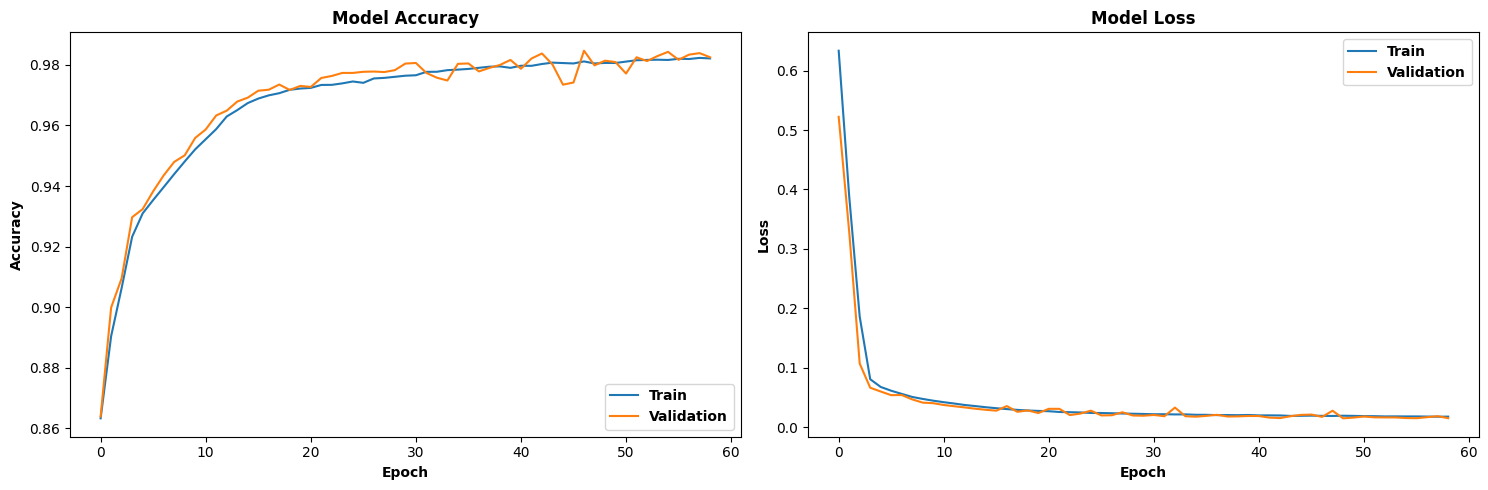

In [88]:
plot_training_history(history_ann_sgd_Fixed)

Sinusoidal Trajectory

In [89]:
data_Sinusoidal = pd.read_csv('Three Link_Sinusoidal Trajectory.csv')

x_Sinusoidal = data_Sinusoidal.iloc[:, 0:3].values
y_Sinusoidal = data_Sinusoidal.iloc[:, 3:].values
x_train_Sinusoidal, x_test_Sinusoidal, y_train_Sinusoidal, y_test_Sinusoidal = train_test_split(x_Sinusoidal, y_Sinusoidal, test_size = 0.20)

In [90]:
ann_adam_Sinusoidal = ann(optimizer='adam')
ann_adam_Sinusoidal.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history_ann_adam_Sinusoidal = ann_adam_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8412 - loss: 0.2952 - val_accuracy: 0.9255 - val_loss: 0.0379
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9281 - loss: 0.0377 - val_accuracy: 0.9383 - val_loss: 0.0279
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9363 - loss: 0.0317 - val_accuracy: 0.9322 - val_loss: 0.0256
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9384 - loss: 0.0287 - val_accuracy: 0.9319 - val_loss: 0.0237
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9413 - loss: 0.0259 - val_accuracy: 0.9377 - val_loss: 0.0344
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9446 - loss: 0.0253 - val_accuracy: 0.9532 - val_loss: 0.0381
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9473 - loss: 0.0238 - val_accuracy: 0.9361 - val_loss: 0.0292
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9452 - lo

In [92]:
test_loss_ann_adam_Sinusoidal, test_acc_ann_adam_Sinusoidal = ann_adam_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adam_Sinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9684 - loss: 0.0137
Testing the Model :
Testing Loss : 0.013648166321218014
Testing Accuracy : 0.9670666456222534


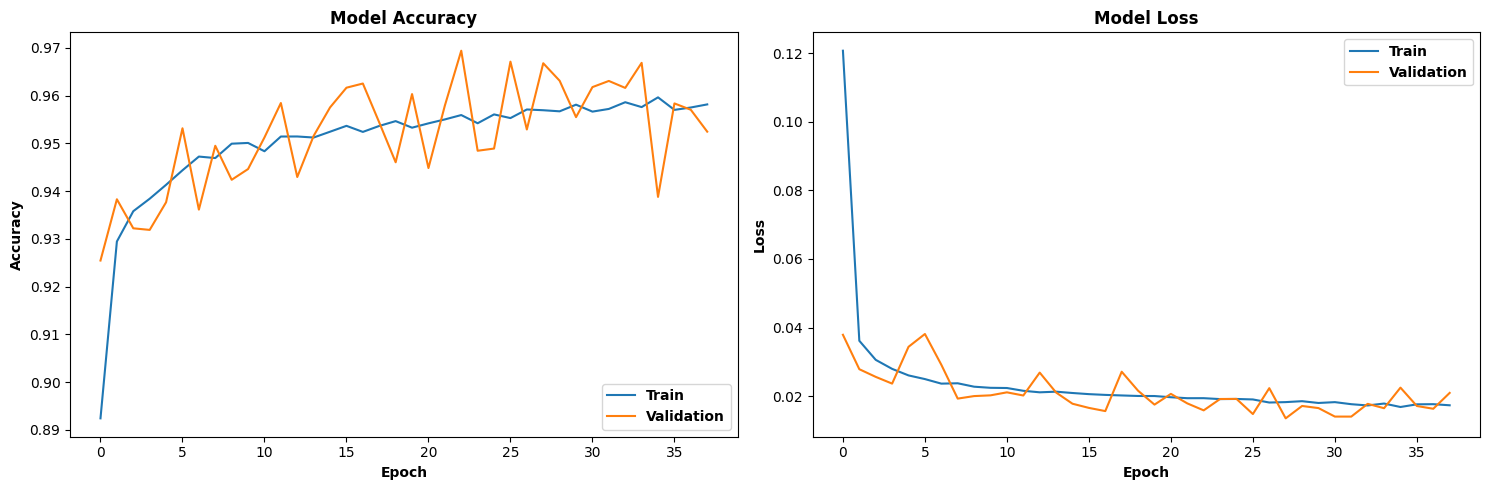

In [93]:
plot_training_history(history_ann_adam_Sinusoidal)

In [94]:
ann_adamw_Sinusoidal = ann(optimizer='adamw')
ann_adamw_Sinusoidal.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
history_ann_adamw_Sinusoidal = ann_adamw_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7888 - loss: 0.5039 - val_accuracy: 0.9177 - val_loss: 0.0556
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9244 - loss: 0.0449 - val_accuracy: 0.9387 - val_loss: 0.0336
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9338 - loss: 0.0347 - val_accuracy: 0.9356 - val_loss: 0.0313
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9408 - loss: 0.0294 - val_accuracy: 0.9412 - val_loss: 0.0263
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9446 - loss: 0.0260 - val_accuracy: 0.9492 - val_loss: 0.0225
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9483 - loss: 0.0235 - val_accuracy: 0.9527 - val_loss: 0.0216
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9477 - loss: 0.0229 - val_accuracy: 0.9521 - val_loss: 0.0207
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9514 - lo

In [96]:
test_loss_ann_adamw_Sinusoidal, test_acc_ann_adamw_Sinusoidal = ann_adamw_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adamw_Sinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9660 - loss: 0.0145
Testing the Model :
Testing Loss : 0.014661520719528198
Testing Accuracy : 0.963533341884613


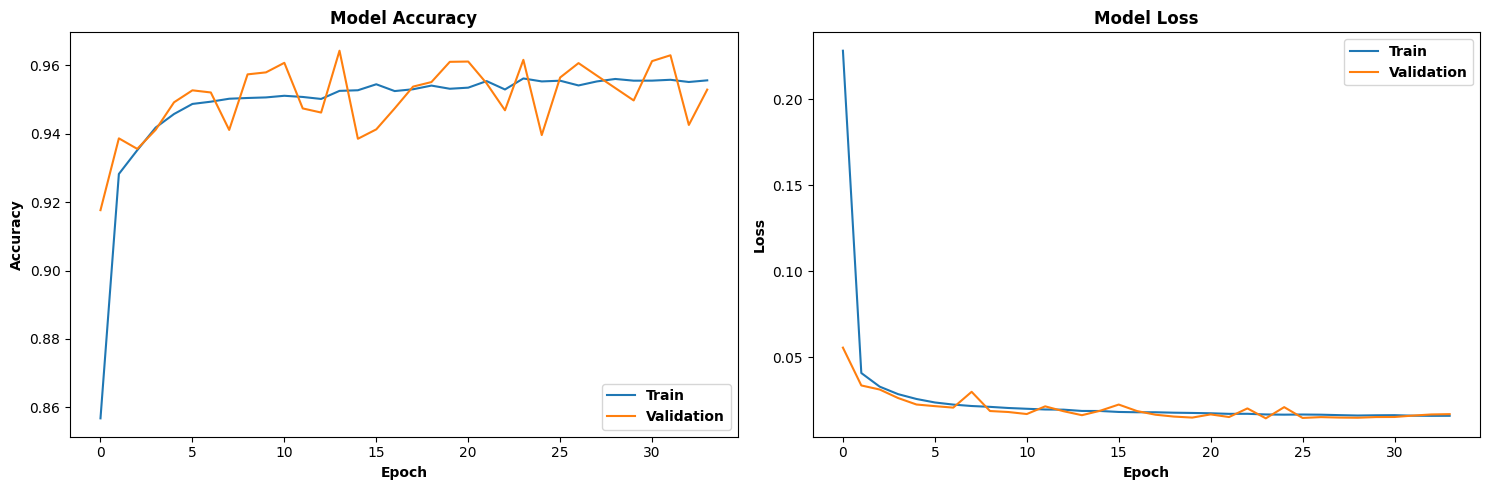

In [97]:
plot_training_history(history_ann_adamw_Sinusoidal)

In [98]:
ann_adadelta_Sinusoidal = ann(optimizer='adadelta')
ann_adadelta_Sinusoidal.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
history_ann_adadelta_Sinusoidal = ann_adadelta_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7818 - loss: 0.4503 - val_accuracy: 0.9191 - val_loss: 0.0513
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9260 - loss: 0.0467 - val_accuracy: 0.9312 - val_loss: 0.0342
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9396 - loss: 0.0342 - val_accuracy: 0.9460 - val_loss: 0.0284
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9432 - loss: 0.0305 - val_accuracy: 0.9429 - val_loss: 0.0264
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9478 - loss: 0.0277 - val_accuracy: 0.9528 - val_loss: 0.0244
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9517 - loss: 0.0254 - val_accuracy: 0.9572 - val_loss: 0.0213
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9539 - loss: 0.0239 - val_accuracy: 0.9611 - val_loss: 0.0238
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9565 - lo

In [100]:
test_loss_ann_adadelta_Sinusoidal, test_acc_ann_adadelta_Sinusoidal = ann_adadelta_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adadelta_Sinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9639 - loss: 0.0129
Testing the Model :
Testing Loss : 0.013218387961387634
Testing Accuracy : 0.962233304977417


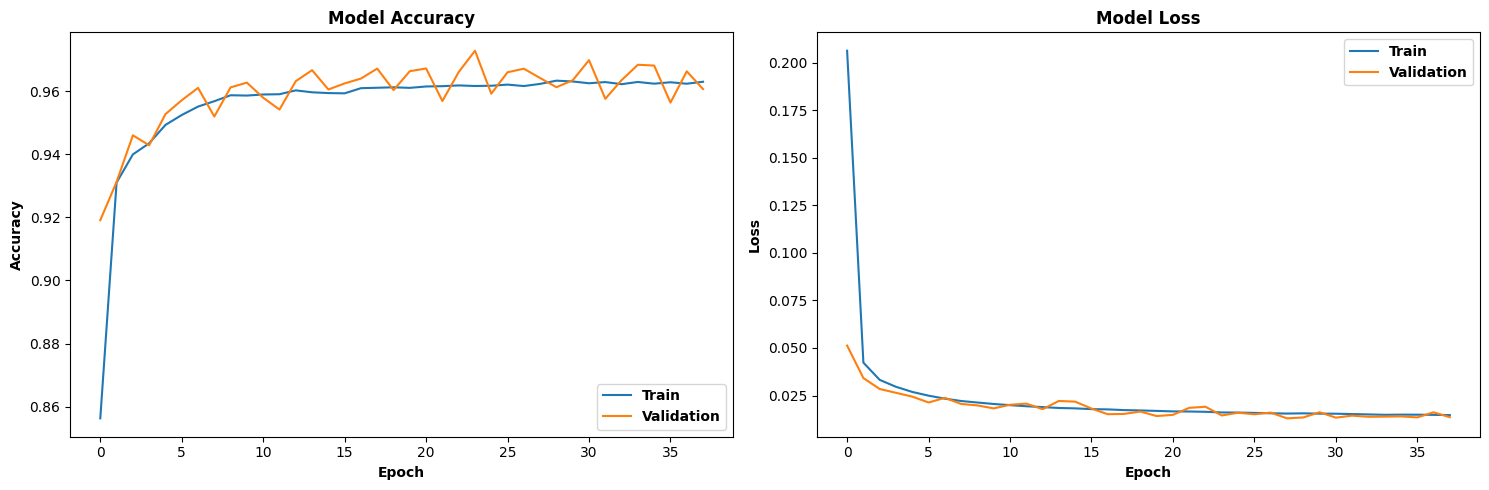

In [101]:
plot_training_history(history_ann_adadelta_Sinusoidal)

In [102]:
ann_adagrad_Sinusoidal = ann(optimizer='adagrad')
ann_adagrad_Sinusoidal.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
history_ann_adagrad_Sinusoidal = ann_adagrad_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8167 - loss: 0.3298 - val_accuracy: 0.9285 - val_loss: 0.0446
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9339 - loss: 0.0440 - val_accuracy: 0.9465 - val_loss: 0.0362
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9460 - loss: 0.0354 - val_accuracy: 0.9475 - val_loss: 0.0308
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9495 - loss: 0.0311 - val_accuracy: 0.9510 - val_loss: 0.0294
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9507 - loss: 0.0278 - val_accuracy: 0.9521 - val_loss: 0.0245
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9532 - loss: 0.0262 - val_accuracy: 0.9489 - val_loss: 0.0232
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9571 - loss: 0.0236 - val_accuracy: 0.9565 - val_loss: 0.0223
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9564 - loss

In [104]:
test_loss_ann_adagrad_Sinusoidal, test_acc_ann_adagrad_Sinusoidal = ann_adagrad_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_adagrad_Sinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.0100
Testing the Model :
Testing Loss : 0.010076780803501606
Testing Accuracy : 0.9728333353996277


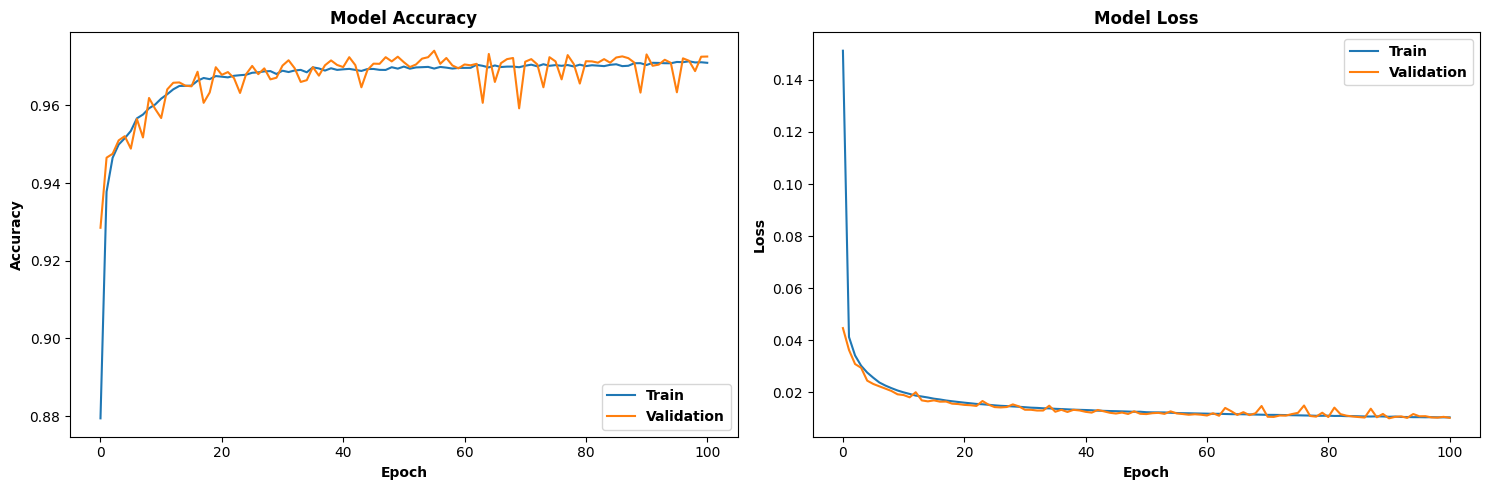

In [105]:
plot_training_history(history_ann_adagrad_Sinusoidal)

In [106]:
ann_rmsprop_Sinusoidal = ann(optimizer='rmsprop')
ann_rmsprop_Sinusoidal.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history_ann_rmsprop_Sinusoidal = ann_rmsprop_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7031 - loss: 0.8520 - val_accuracy: 0.8835 - val_loss: 0.2016
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8906 - loss: 0.1421 - val_accuracy: 0.9095 - val_loss: 0.0718
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9124 - loss: 0.0622 - val_accuracy: 0.9144 - val_loss: 0.0450
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9208 - loss: 0.0442 - val_accuracy: 0.9319 - val_loss: 0.0382
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9278 - loss: 0.0381 - val_accuracy: 0.9332 - val_loss: 0.0336
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9337 - loss: 0.0342 - val_accuracy: 0.9367 - val_loss: 0.0304
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9370 - loss: 0.0317 - val_accuracy: 0.9311 - val_loss: 0.0318
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9423 - loss

In [108]:
test_loss_ann_rmsprop_Sinusoidal, test_acc_ann_rmsprop_Sinusoidal = ann_rmsprop_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_rmsprop_Sinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.0127
Testing the Model :
Testing Loss : 0.012959719635546207
Testing Accuracy : 0.9634666442871094


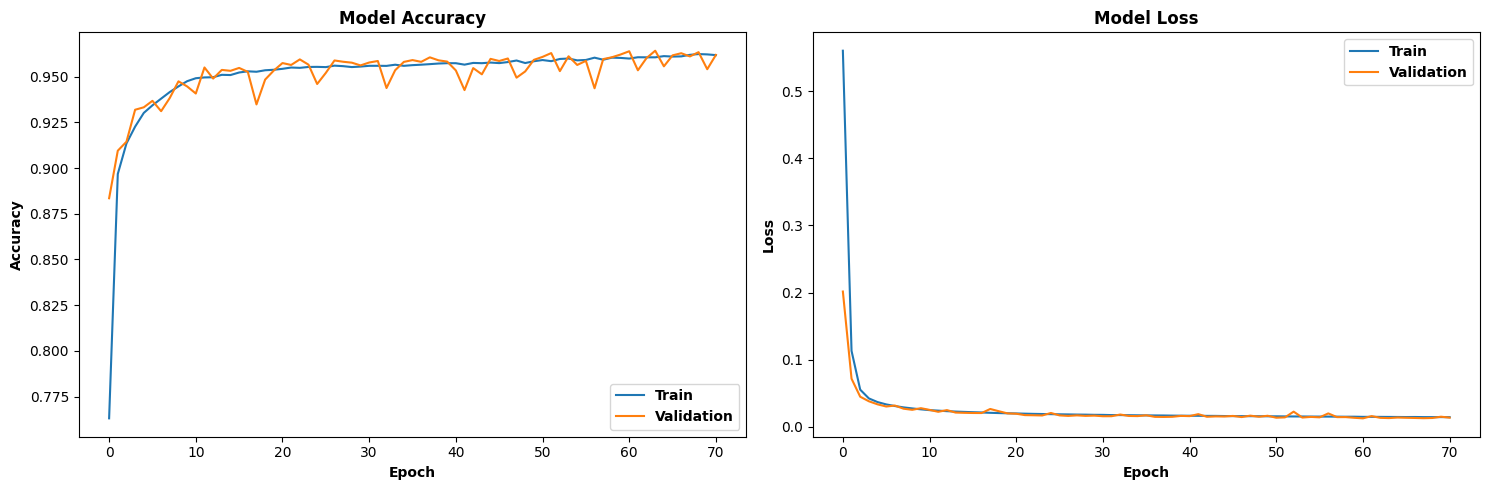

In [109]:
plot_training_history(history_ann_rmsprop_Sinusoidal)

In [110]:
ann_sgd_Sinusoidal = ann(optimizer='sgd')
ann_sgd_Sinusoidal.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
history_ann_sgd_Sinusoidal = ann_sgd_Sinusoidal.fit(x_train_Sinusoidal, y_train_Sinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7022 - loss: 0.7162 - val_accuracy: 0.7173 - val_loss: 0.4420
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7915 - loss: 0.3384 - val_accuracy: 0.8825 - val_loss: 0.1916
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8869 - loss: 0.1409 - val_accuracy: 0.9049 - val_loss: 0.0662
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9029 - loss: 0.0654 - val_accuracy: 0.9135 - val_loss: 0.0591
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9069 - loss: 0.0584 - val_accuracy: 0.9020 - val_loss: 0.0569
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9106 - loss: 0.0552 - val_accuracy: 0.9071 - val_loss: 0.0541
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9113 - loss: 0.0540 - val_accuracy: 0.9096 - val_loss: 0.0508
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9136 - loss

In [112]:
test_loss_ann_sgd_Sinusoidal, test_acc_ann_sgd_Sinusoidal = ann_sgd_Sinusoidal.evaluate(x_test_Sinusoidal, y_test_Sinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_Sinusoidal)
print('Testing Accuracy :', test_acc_ann_sgd_Sinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9587 - loss: 0.0219
Testing the Model :
Testing Loss : 0.02173691615462303
Testing Accuracy : 0.9587000012397766


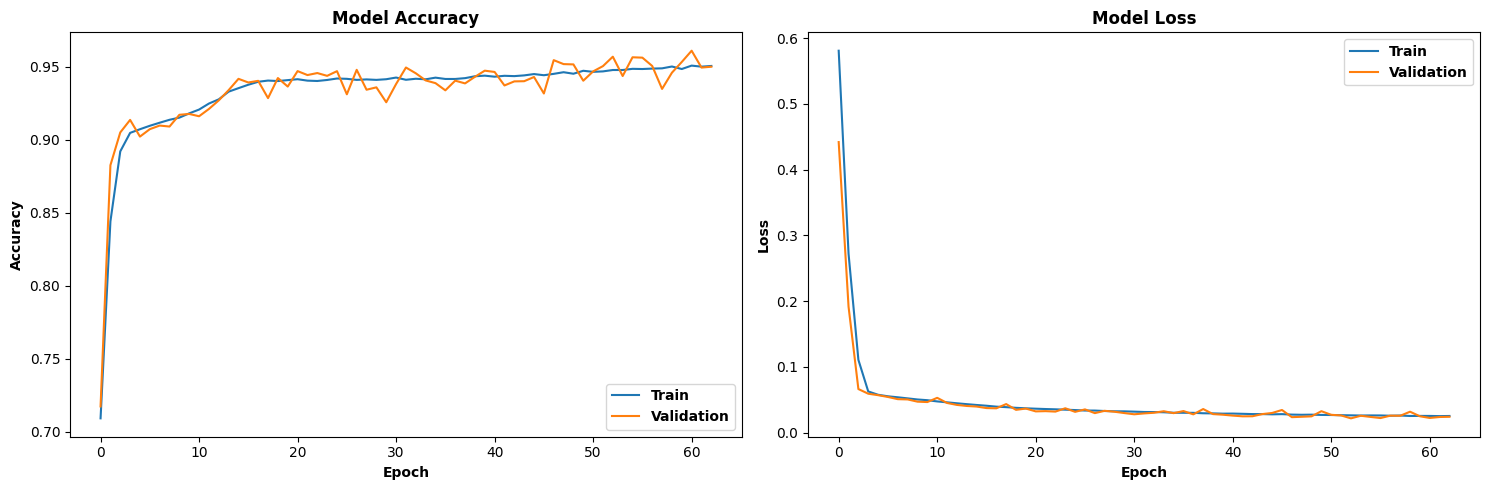

In [113]:
plot_training_history(history_ann_sgd_Sinusoidal)

Random-Fixed Dataset

In [51]:
data_RandomFixed = pd.read_csv('Three Link_RandomFixed.csv')

x_RandomFixed = data_RandomFixed.iloc[:, 0:3].values
y_RandomFixed = data_RandomFixed.iloc[:, 3:].values
x_train_RandomFixed, x_test_RandomFixed, y_train_RandomFixed, y_test_RandomFixed = train_test_split(x_RandomFixed, y_RandomFixed, test_size = 0.20)

In [115]:
ann_adam_RandomFixed = ann(optimizer='adam')
ann_adam_RandomFixed.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
history_ann_adam_RandomFixed = ann_adam_RandomFixed.fit(x_train_RandomFixed, y_train_RandomFixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9079 - loss: 0.4008 - val_accuracy: 0.9636 - val_loss: 0.0358
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9621 - loss: 0.0352 - val_accuracy: 0.9653 - val_loss: 0.0287
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9665 - loss: 0.0296 - val_accuracy: 0.9759 - val_loss: 0.0285
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9710 - loss: 0.0258 - val_accuracy: 0.9739 - val_loss: 0.0269
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9727 - loss: 0.0236 - val_accuracy: 0.9752 - val_loss: 0.0407
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9720 - loss: 0.0236 - val_accuracy: 0.9793 - val_loss: 0.0236
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9739 - loss: 0.0222 - val_accuracy: 0.9786 - val_loss: 0.0217
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9749 - lo

In [117]:
test_loss_ann_adam_RandomFixed, test_acc_ann_adam_RandomFixed = ann_adam_RandomFixed.evaluate(x_test_RandomFixed, y_test_RandomFixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_RandomFixed)
print('Testing Accuracy :', test_acc_ann_adam_RandomFixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9800 - loss: 0.0104
Testing the Model :
Testing Loss : 0.010075420141220093
Testing Accuracy : 0.980733335018158


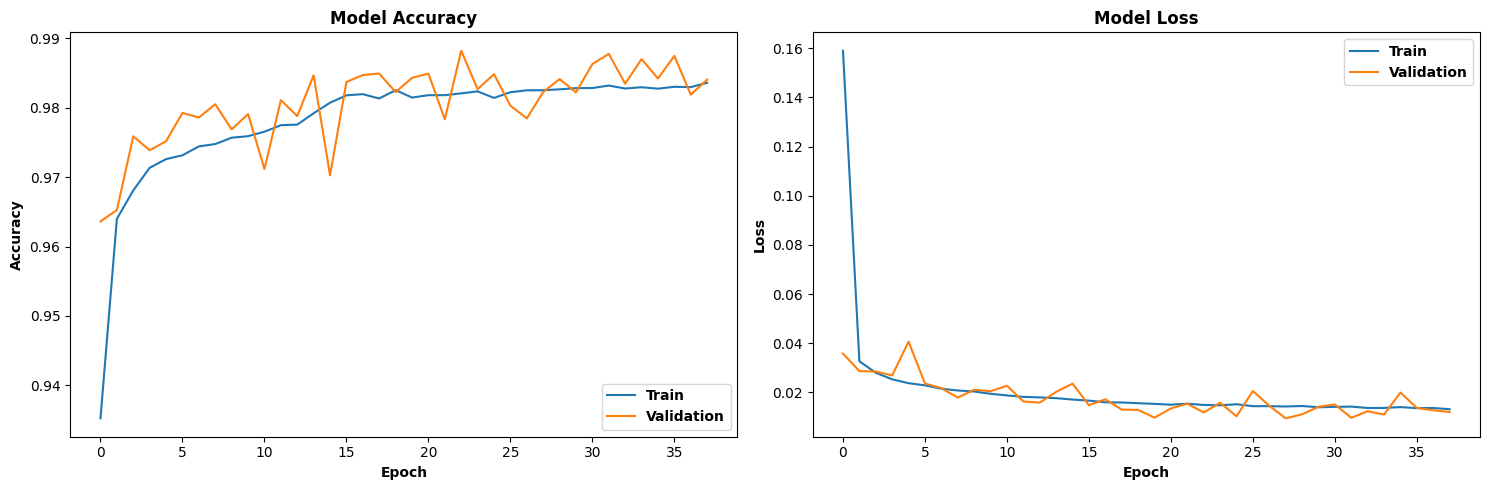

In [118]:
plot_training_history(history_ann_adam_RandomFixed)

In [119]:
ann_adamw_RandomFixed = ann(optimizer='adamw')
ann_adamw_RandomFixed.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
history_ann_adamw_RandomFixed = ann_adamw_RandomFixed.fit(x_train_RandomFixed, y_train_RandomFixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8870 - loss: 0.6686 - val_accuracy: 0.9405 - val_loss: 0.0593
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9449 - loss: 0.0521 - val_accuracy: 0.9643 - val_loss: 0.0360
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9626 - loss: 0.0349 - val_accuracy: 0.9699 - val_loss: 0.0276
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9672 - loss: 0.0284 - val_accuracy: 0.9675 - val_loss: 0.0237
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9701 - loss: 0.0238 - val_accuracy: 0.9718 - val_loss: 0.0208
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9730 - loss: 0.0215 - val_accuracy: 0.9790 - val_loss: 0.0185
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9747 - loss: 0.0201 - val_accuracy: 0.9682 - val_loss: 0.0210
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9756 - los

In [121]:
test_loss_ann_adamw_RandomFixed, test_acc_ann_adamw_RandomFixed = ann_adamw_RandomFixed.evaluate(x_test_RandomFixed, y_test_RandomFixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_RandomFixed)
print('Testing Accuracy :', test_acc_ann_adamw_RandomFixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9823 - loss: 0.0100
Testing the Model :
Testing Loss : 0.009446394629776478
Testing Accuracy : 0.9833999872207642


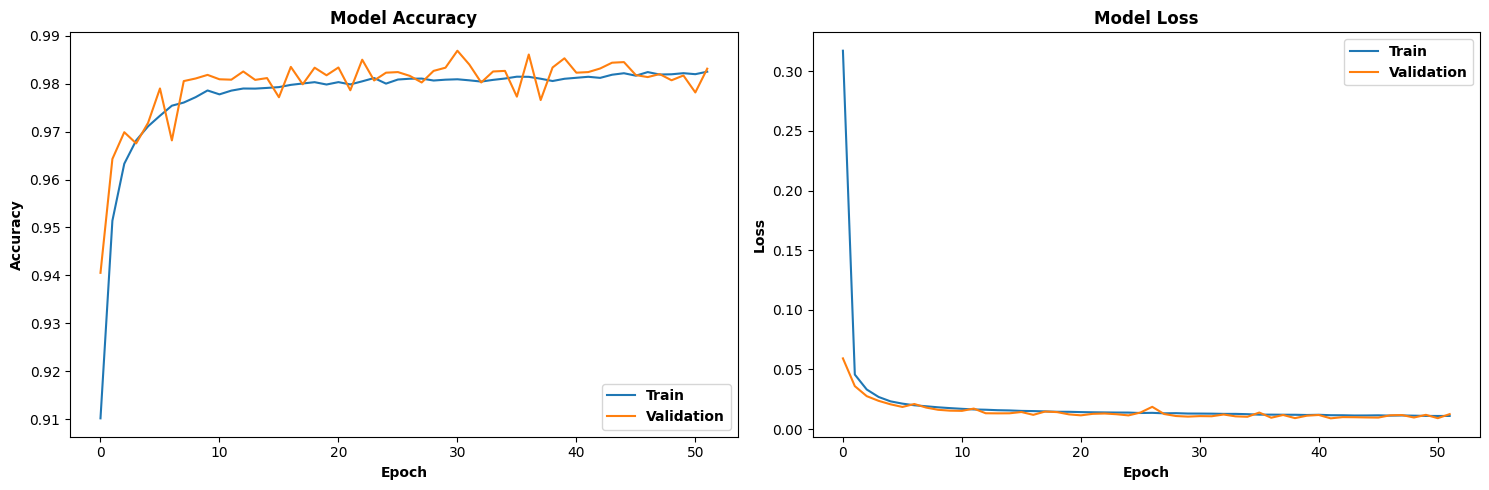

In [122]:
plot_training_history(history_ann_adamw_RandomFixed)

In [123]:
ann_adadelta_RandomFixed = ann(optimizer='adadelta')
ann_adadelta_RandomFixed.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history_ann_adadelta_RandomFixed = ann_adadelta_RandomFixed.fit(x_train_RandomFixed, y_train_RandomFixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8825 - loss: 0.5627 - val_accuracy: 0.9457 - val_loss: 0.0769
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9519 - loss: 0.0593 - val_accuracy: 0.9620 - val_loss: 0.0344
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9625 - loss: 0.0358 - val_accuracy: 0.9724 - val_loss: 0.0310
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9690 - loss: 0.0278 - val_accuracy: 0.9741 - val_loss: 0.0223
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9712 - loss: 0.0240 - val_accuracy: 0.9770 - val_loss: 0.0194
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9749 - loss: 0.0217 - val_accuracy: 0.9808 - val_loss: 0.0171
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9775 - loss: 0.0196 - val_accuracy: 0.9803 - val_loss: 0.0210
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9781 - 

In [125]:
test_loss_ann_adadelta_RandomFixed, test_acc_ann_adadelta_RandomFixed = ann_adadelta_RandomFixed.evaluate(x_test_RandomFixed, y_test_RandomFixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_RandomFixed)
print('Testing Accuracy :', test_acc_ann_adadelta_RandomFixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9851 - loss: 0.0081
Testing the Model :
Testing Loss : 0.007656081113964319
Testing Accuracy : 0.9849333167076111


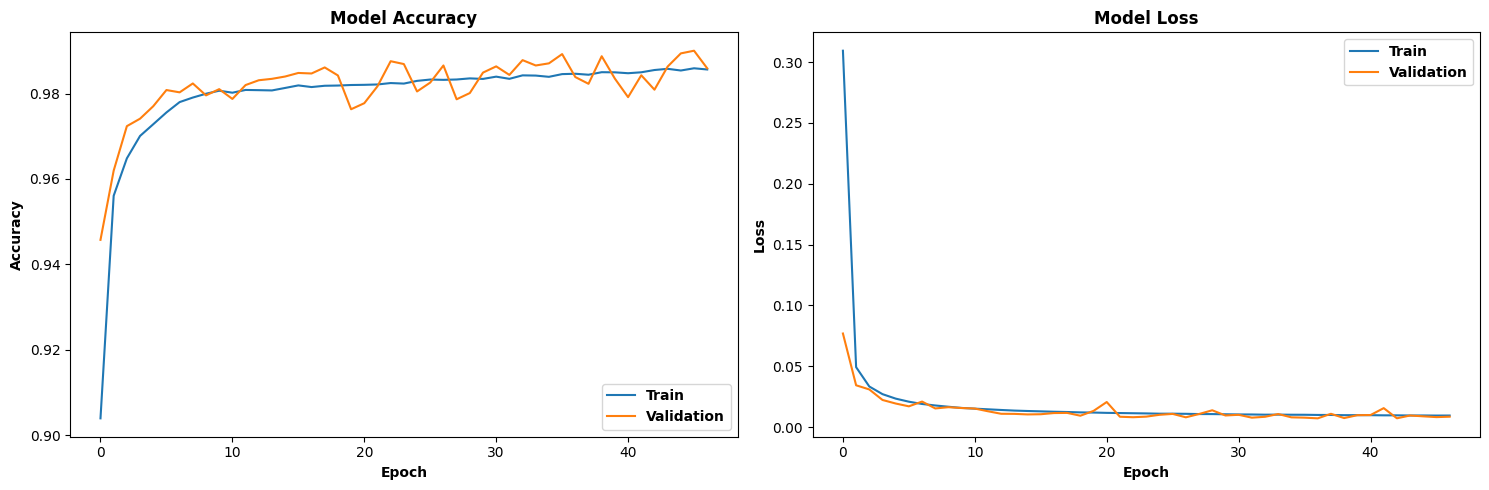

In [126]:
plot_training_history(history_ann_adadelta_RandomFixed)

In [44]:
ann_adagrad_RandomFixed = ann(optimizer='adagrad')
ann_adagrad_RandomFixed.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history_ann_adagrad_RandomFixed = ann_adagrad_RandomFixed.fit(x_train_RandomFixed, y_train_RandomFixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9052 - loss: 0.4047 - val_accuracy: 0.9536 - val_loss: 0.0462
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9603 - loss: 0.0381 - val_accuracy: 0.9715 - val_loss: 0.0258
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9704 - loss: 0.0261 - val_accuracy: 0.9764 - val_loss: 0.0227
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9748 - loss: 0.0218 - val_accuracy: 0.9771 - val_loss: 0.0196
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9772 - loss: 0.0191 - val_accuracy: 0.9773 - val_loss: 0.0174
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9793 - loss: 0.0170 - val_accuracy: 0.9811 - val_loss: 0.0151
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9801 - loss: 0.0157 - val_accuracy: 0.9772 - val_loss: 0.0178
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9814 - loss

In [53]:
test_loss_ann_adagrad_RandomFixed, test_acc_ann_adagrad_RandomFixed = ann_adagrad_RandomFixed.evaluate(x_test_RandomFixed, y_test_RandomFixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_RandomFixed)
print('Testing Accuracy :', test_acc_ann_adagrad_RandomFixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9887 - loss: 0.0057
Testing the Model :
Testing Loss : 0.005609338171780109
Testing Accuracy : 0.9892333149909973


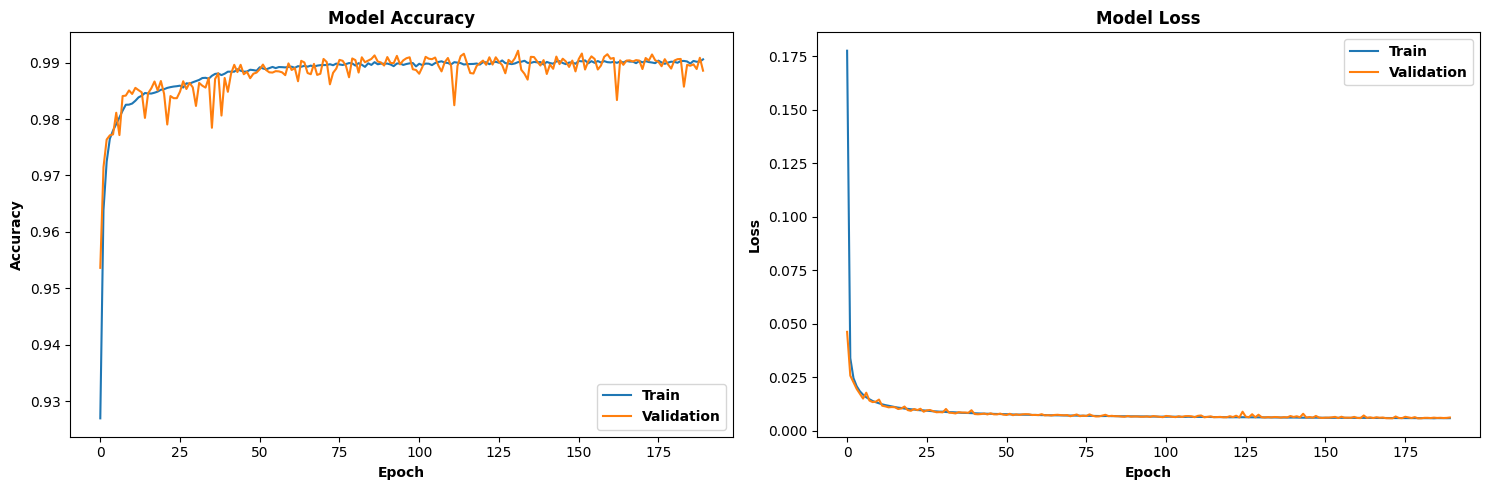

In [54]:
plot_training_history(history_ann_adagrad_RandomFixed)

In [55]:
ann_rmsprop_RandomFixed = ann(optimizer='rmsprop')
ann_rmsprop_RandomFixed.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history_ann_rmsprop_RandomFixed = ann_rmsprop_RandomFixed.fit(x_train_RandomFixed, y_train_RandomFixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8718 - loss: 1.0788 - val_accuracy: 0.8975 - val_loss: 0.3181
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9012 - loss: 0.2555 - val_accuracy: 0.9286 - val_loss: 0.0994
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9307 - loss: 0.0866 - val_accuracy: 0.9397 - val_loss: 0.0596
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9400 - loss: 0.0567 - val_accuracy: 0.9485 - val_loss: 0.0461
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9483 - loss: 0.0439 - val_accuracy: 0.9565 - val_loss: 0.0378
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9569 - loss: 0.0368 - val_accuracy: 0.9590 - val_loss: 0.0332
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9632 - loss: 0.0317 - val_accuracy: 0.9654 - val_loss: 0.0284
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9664 - loss

In [57]:
test_loss_ann_rmsprop_RandomFixed, test_acc_ann_rmsprop_RandomFixed = ann_rmsprop_RandomFixed.evaluate(x_test_RandomFixed, y_test_RandomFixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_RandomFixed)
print('Testing Accuracy :', test_acc_ann_rmsprop_RandomFixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9859 - loss: 0.0100
Testing the Model :
Testing Loss : 0.009887107647955418
Testing Accuracy : 0.9855333566665649


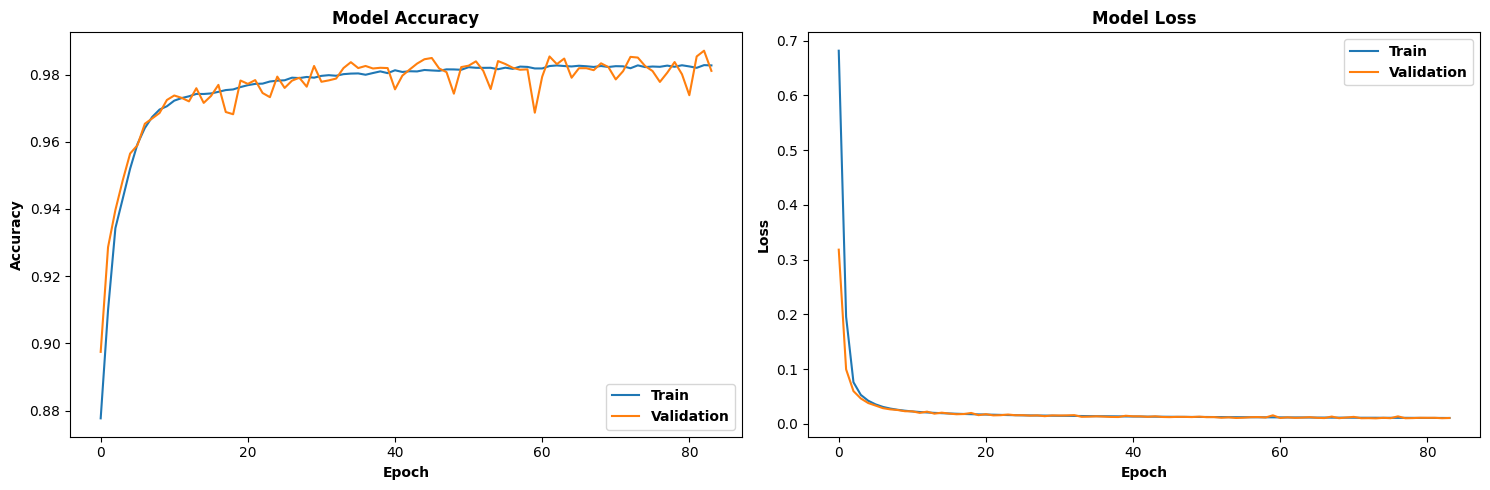

In [58]:
plot_training_history(history_ann_rmsprop_RandomFixed)

In [59]:
ann_sgd_RandomFixed = ann(optimizer='sgd')
ann_sgd_RandomFixed.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history_ann_sgd_RandomFixed = ann_sgd_RandomFixed.fit(x_train_RandomFixed, y_train_RandomFixed, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8715 - loss: 0.8279 - val_accuracy: 0.8773 - val_loss: 0.4464
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9026 - loss: 0.3899 - val_accuracy: 0.9081 - val_loss: 0.2824
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9083 - loss: 0.2030 - val_accuracy: 0.9132 - val_loss: 0.1001
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9234 - loss: 0.0805 - val_accuracy: 0.9285 - val_loss: 0.0664
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9295 - loss: 0.0671 - val_accuracy: 0.9330 - val_loss: 0.0633
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9332 - loss: 0.0606 - val_accuracy: 0.9339 - val_loss: 0.0563
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9365 - loss: 0.0555 - val_accuracy: 0.9419 - val_loss: 0.0590
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9377 - loss:

In [61]:
test_loss_ann_sgd_RandomFixed, test_acc_ann_sgd_RandomFixed = ann_sgd_RandomFixed.evaluate(x_test_RandomFixed, y_test_RandomFixed)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_RandomFixed)
print('Testing Accuracy :', test_acc_ann_sgd_RandomFixed)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9874 - loss: 0.0118
Testing the Model :
Testing Loss : 0.011871290393173695
Testing Accuracy : 0.9871333241462708


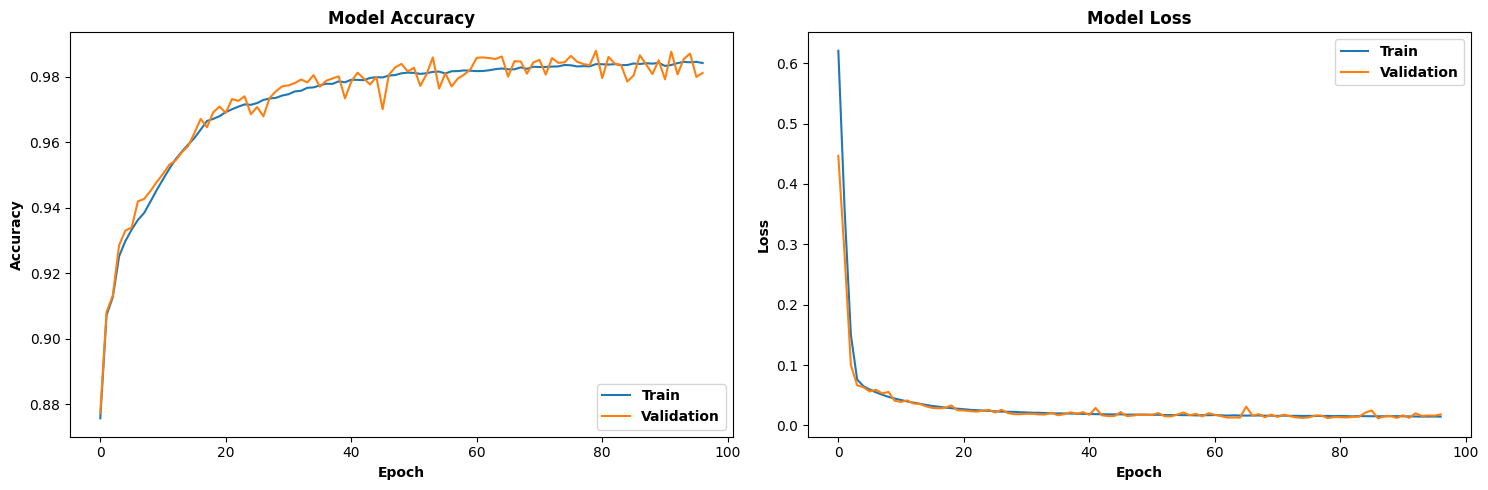

In [62]:
plot_training_history(history_ann_sgd_RandomFixed)

Fixed-Sinusoidal Dataset

In [63]:
data_FixedSinusoidal = pd.read_csv('Three Link_FixedSinusoidal.csv')

x_FixedSinusoidal = data_FixedSinusoidal.iloc[:, 0:3].values
y_FixedSinusoidal = data_FixedSinusoidal.iloc[:, 3:].values
x_train_FixedSinusoidal, x_test_FixedSinusoidal, y_train_FixedSinusoidal, y_test_FixedSinusoidal = train_test_split(x_FixedSinusoidal, y_FixedSinusoidal, test_size = 0.20)

In [64]:
ann_adam_FixedSinusoidal = ann(optimizer='adam')
ann_adam_FixedSinusoidal.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history_ann_adam_FixedSinusoidal = ann_adam_FixedSinusoidal.fit(x_train_FixedSinusoidal, y_train_FixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8676 - loss: 0.3765 - val_accuracy: 0.9441 - val_loss: 0.0533
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9403 - loss: 0.0476 - val_accuracy: 0.9545 - val_loss: 0.0411
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9473 - loss: 0.0377 - val_accuracy: 0.9566 - val_loss: 0.0327
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9515 - loss: 0.0329 - val_accuracy: 0.9557 - val_loss: 0.0298
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9514 - loss: 0.0302 - val_accuracy: 0.9532 - val_loss: 0.0228
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9531 - loss: 0.0283 - val_accuracy: 0.9613 - val_loss: 0.0263
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9540 - loss: 0.0274 - val_accuracy: 0.9632 - val_loss: 0.0245
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9575 - loss:

In [66]:
test_loss_ann_adam_FixedSinusoidal, test_acc_ann_adam_FixedSinusoidal = ann_adam_FixedSinusoidal.evaluate(x_test_FixedSinusoidal, y_test_FixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_FixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adam_FixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9729 - loss: 0.0142
Testing the Model :
Testing Loss : 0.014953679405152798
Testing Accuracy : 0.9731000065803528


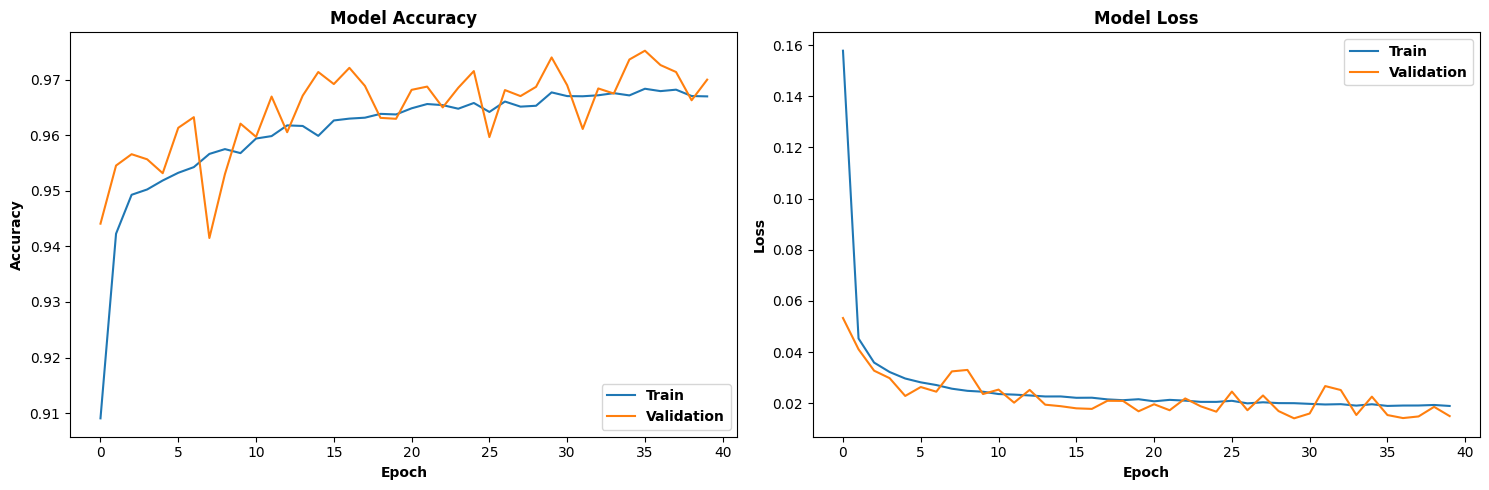

In [67]:
plot_training_history(history_ann_adam_FixedSinusoidal)

In [68]:
ann_adamw_FixedSinusoidal = ann(optimizer='adamw')
ann_adamw_FixedSinusoidal.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history_ann_adamw_FixedSinusoidal = ann_adamw_FixedSinusoidal.fit(x_train_FixedSinusoidal, y_train_FixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8259 - loss: 0.6514 - val_accuracy: 0.9182 - val_loss: 0.0612
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9282 - loss: 0.0578 - val_accuracy: 0.9460 - val_loss: 0.0415
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9453 - loss: 0.0425 - val_accuracy: 0.9480 - val_loss: 0.0332
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9501 - loss: 0.0353 - val_accuracy: 0.9540 - val_loss: 0.0301
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9543 - loss: 0.0310 - val_accuracy: 0.9589 - val_loss: 0.0274
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9570 - loss: 0.0290 - val_accuracy: 0.9621 - val_loss: 0.0240
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9591 - loss: 0.0270 - val_accuracy: 0.9548 - val_loss: 0.0261
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9594 - loss

In [70]:
test_loss_ann_adamw_FixedSinusoidal, test_acc_ann_adamw_FixedSinusoidal = ann_adamw_FixedSinusoidal.evaluate(x_test_FixedSinusoidal, y_test_FixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_FixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adamw_FixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9744 - loss: 0.0144
Testing the Model :
Testing Loss : 0.015393893234431744
Testing Accuracy : 0.973800003528595


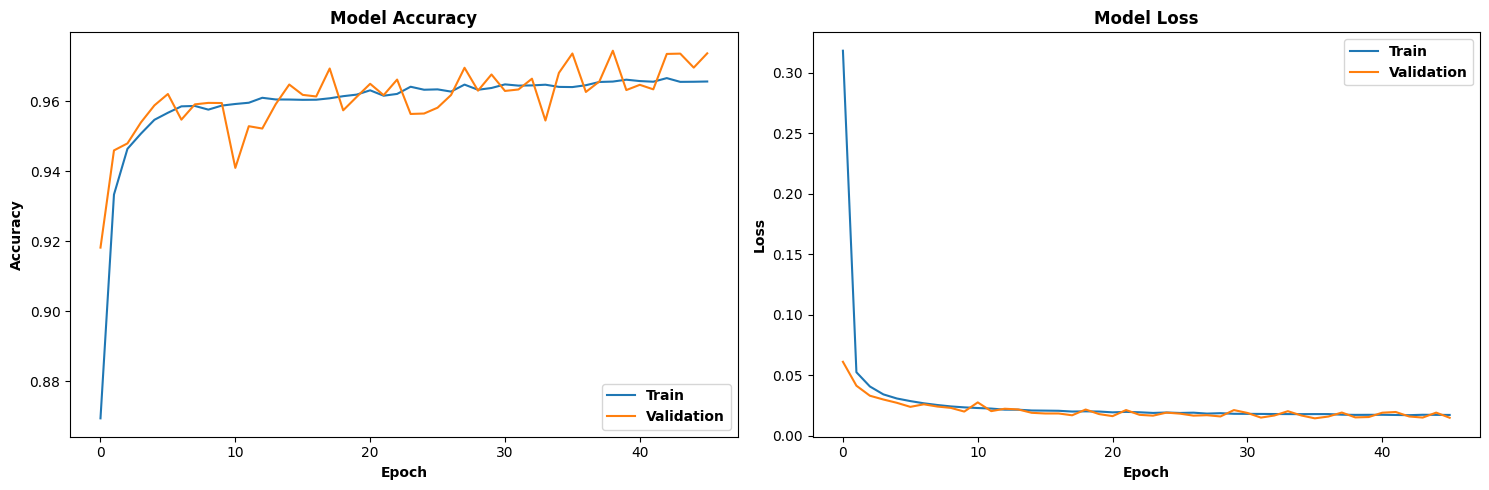

In [71]:
plot_training_history(history_ann_adamw_FixedSinusoidal)

In [72]:
ann_adadelta_FixedSinusoidal = ann(optimizer='adadelta')
ann_adadelta_FixedSinusoidal.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history_ann_adadelta_FixedSinusoidal = ann_adadelta_FixedSinusoidal.fit(x_train_FixedSinusoidal, y_train_FixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8469 - loss: 0.4799 - val_accuracy: 0.9329 - val_loss: 0.0537
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9387 - loss: 0.0491 - val_accuracy: 0.9550 - val_loss: 0.0351
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9539 - loss: 0.0348 - val_accuracy: 0.9593 - val_loss: 0.0305
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9595 - loss: 0.0306 - val_accuracy: 0.9642 - val_loss: 0.0260
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9609 - loss: 0.0275 - val_accuracy: 0.9643 - val_loss: 0.0235
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9632 - loss: 0.0251 - val_accuracy: 0.9690 - val_loss: 0.0225
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9655 - loss: 0.0239 - val_accuracy: 0.9709 - val_loss: 0.0204
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9666 - loss

In [74]:
test_loss_ann_adadelta_FixedSinusoidal, test_acc_ann_adadelta_FixedSinusoidal = ann_adadelta_FixedSinusoidal.evaluate(x_test_FixedSinusoidal, y_test_FixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_FixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adadelta_FixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9781 - loss: 0.0109
Testing the Model :
Testing Loss : 0.01172090694308281
Testing Accuracy : 0.9783999919891357


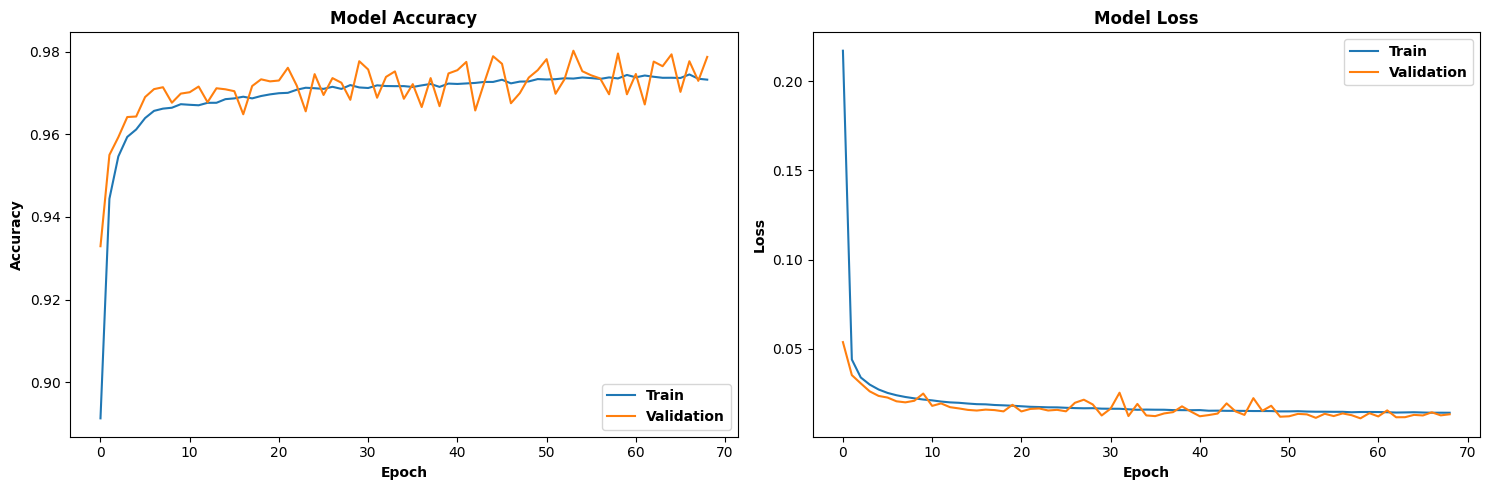

In [75]:
plot_training_history(history_ann_adadelta_FixedSinusoidal)

In [76]:
ann_adagrad_FixedSinusoidal = ann(optimizer='adagrad')
ann_adagrad_FixedSinusoidal.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
history_ann_adagrad_FixedSinusoidal = ann_adagrad_FixedSinusoidal.fit(x_train_FixedSinusoidal, y_train_FixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8550 - loss: 0.3733 - val_accuracy: 0.9320 - val_loss: 0.0544
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9396 - loss: 0.0506 - val_accuracy: 0.9530 - val_loss: 0.0376
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9537 - loss: 0.0364 - val_accuracy: 0.9635 - val_loss: 0.0291
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9613 - loss: 0.0286 - val_accuracy: 0.9622 - val_loss: 0.0250
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9633 - loss: 0.0260 - val_accuracy: 0.9666 - val_loss: 0.0224
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9647 - loss: 0.0236 - val_accuracy: 0.9693 - val_loss: 0.0199
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9667 - loss: 0.0229 - val_accuracy: 0.9664 - val_loss: 0.0198
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9658 - los

In [78]:
test_loss_ann_adagrad_FixedSinusoidal, test_acc_ann_adagrad_FixedSinusoidal = ann_adagrad_FixedSinusoidal.evaluate(x_test_FixedSinusoidal, y_test_FixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_FixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adagrad_FixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9781 - loss: 0.0096
Testing the Model :
Testing Loss : 0.010342897847294807
Testing Accuracy : 0.9780666828155518


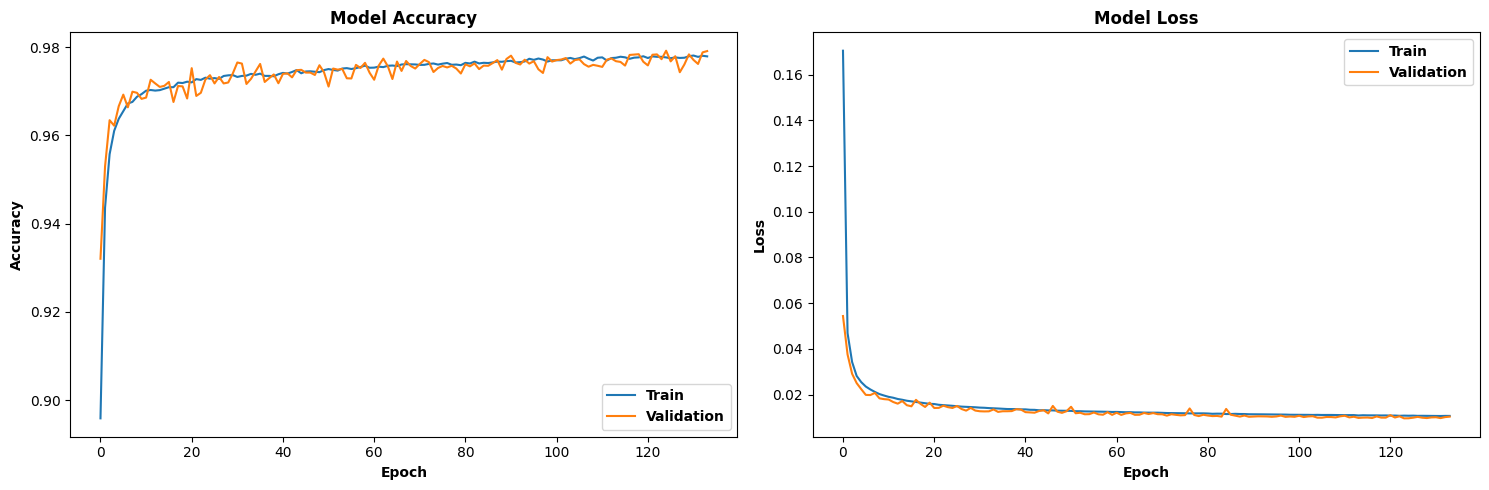

In [79]:
plot_training_history(history_ann_adagrad_FixedSinusoidal)

In [80]:
ann_rmsprop_FixedSinusoidal = ann(optimizer='rmsprop')
ann_rmsprop_FixedSinusoidal.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_126 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history_ann_rmsprop_FixedSinusoidal = ann_rmsprop_FixedSinusoidal.fit(x_train_FixedSinusoidal, y_train_FixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7873 - loss: 1.0051 - val_accuracy: 0.8550 - val_loss: 0.3872
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8593 - loss: 0.2990 - val_accuracy: 0.9029 - val_loss: 0.1154
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9056 - loss: 0.1010 - val_accuracy: 0.9171 - val_loss: 0.0706
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9184 - loss: 0.0671 - val_accuracy: 0.9302 - val_loss: 0.0557
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9346 - loss: 0.0540 - val_accuracy: 0.9417 - val_loss: 0.0491
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9417 - loss: 0.0475 - val_accuracy: 0.9481 - val_loss: 0.0425
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9457 - loss: 0.0441 - val_accuracy: 0.9469 - val_loss: 0.0398
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9483 - los

In [82]:
test_loss_ann_rmsprop_FixedSinusoidal, test_acc_ann_rmsprop_FixedSinusoidal = ann_rmsprop_FixedSinusoidal.evaluate(x_test_FixedSinusoidal, y_test_FixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_FixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_rmsprop_FixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9695 - loss: 0.0147
Testing the Model :
Testing Loss : 0.015640119090676308
Testing Accuracy : 0.9701666831970215


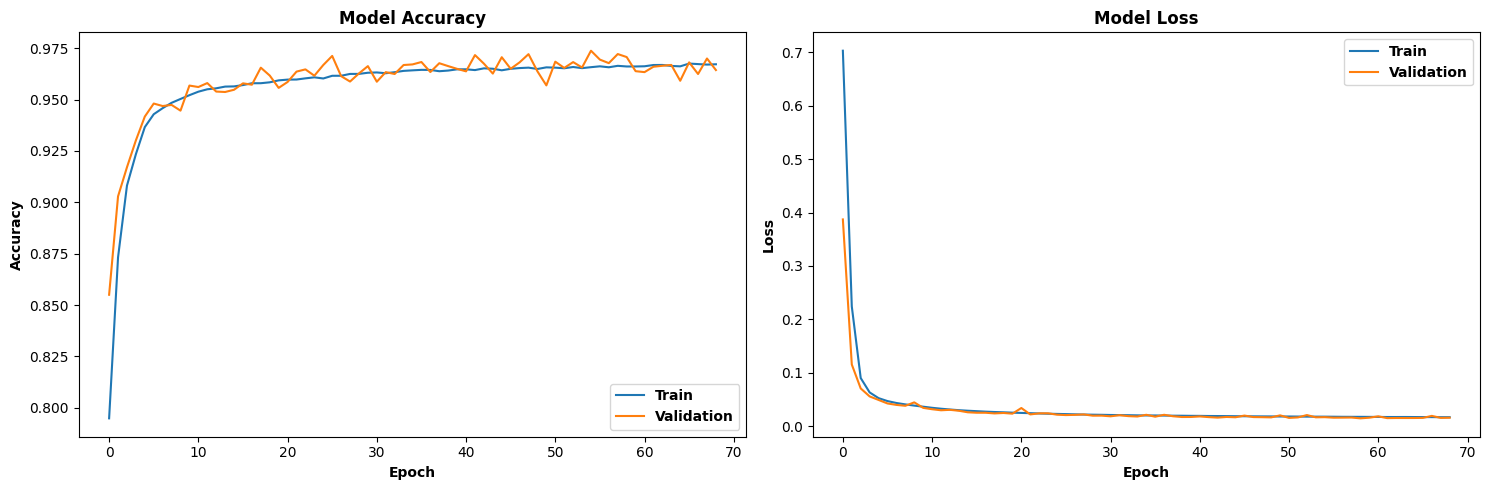

In [83]:
plot_training_history(history_ann_rmsprop_FixedSinusoidal)

In [84]:
ann_sgd_FixedSinusoidal = ann(optimizer='sgd')
ann_sgd_FixedSinusoidal.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history_ann_sgd_FixedSinusoidal = ann_sgd_FixedSinusoidal.fit(x_train_FixedSinusoidal, y_train_FixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7890 - loss: 0.8240 - val_accuracy: 0.7929 - val_loss: 0.5275
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8075 - loss: 0.4294 - val_accuracy: 0.8946 - val_loss: 0.1747
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8921 - loss: 0.1419 - val_accuracy: 0.9012 - val_loss: 0.0986
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8946 - loss: 0.0961 - val_accuracy: 0.8986 - val_loss: 0.0838
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8960 - loss: 0.0857 - val_accuracy: 0.8997 - val_loss: 0.0787
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9004 - loss: 0.0807 - val_accuracy: 0.9000 - val_loss: 0.0753
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9000 - loss: 0.0787 - val_accuracy: 0.9068 - val_loss: 0.0742
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9028 - loss: 

In [86]:
test_loss_ann_sgd_FixedSinusoidal, test_acc_ann_sgd_FixedSinusoidal = ann_sgd_FixedSinusoidal.evaluate(x_test_FixedSinusoidal, y_test_FixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_FixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_sgd_FixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9635 - loss: 0.0215
Testing the Model :
Testing Loss : 0.022436421364545822
Testing Accuracy : 0.9631666541099548


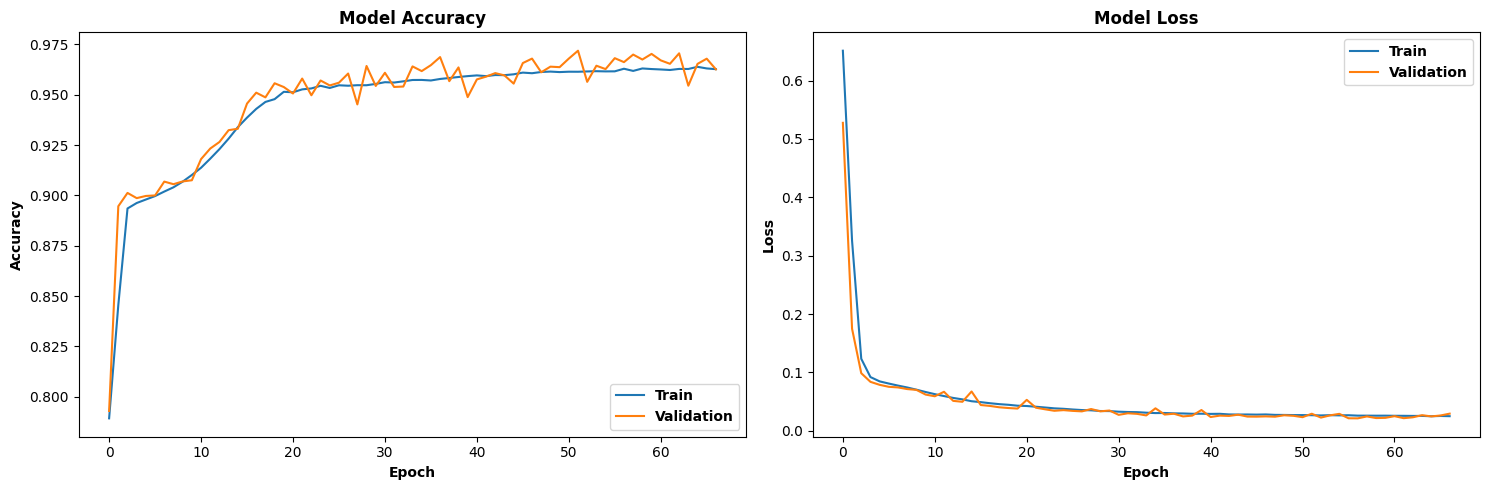

In [87]:
plot_training_history(history_ann_sgd_FixedSinusoidal)

Sinusoidal-Random Dataset

In [88]:
data_SinusoidalRandom = pd.read_csv('Three Link_SinusoidalRandom.csv')

x_SinusoidalRandom = data_SinusoidalRandom.iloc[:, 0:3].values
y_SinusoidalRandom = data_SinusoidalRandom.iloc[:, 3:].values
x_train_SinusoidalRandom, x_test_SinusoidalRandom, y_train_SinusoidalRandom, y_test_SinusoidalRandom = train_test_split(x_SinusoidalRandom, y_SinusoidalRandom, test_size = 0.20)

In [89]:
ann_adam_SinusoidalRandom = ann(optimizer='adam')
ann_adam_SinusoidalRandom.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history_ann_adam_SinusoidalRandom = ann_adam_SinusoidalRandom.fit(x_train_SinusoidalRandom, y_train_SinusoidalRandom, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8743 - loss: 0.3640 - val_accuracy: 0.9400 - val_loss: 0.0437
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9454 - loss: 0.0404 - val_accuracy: 0.9518 - val_loss: 0.0318
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9520 - loss: 0.0333 - val_accuracy: 0.9603 - val_loss: 0.0298
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9554 - loss: 0.0293 - val_accuracy: 0.9626 - val_loss: 0.0261
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9588 - loss: 0.0274 - val_accuracy: 0.9651 - val_loss: 0.0253
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9597 - loss: 0.0269 - val_accuracy: 0.9552 - val_loss: 0.0226
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9616 - loss: 0.0250 - val_accuracy: 0.9620 - val_loss: 0.0225
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9631 - loss

In [91]:
test_loss_ann_adam_SinusoidalRandom, test_acc_ann_adam_SinusoidalRandom = ann_adam_SinusoidalRandom.evaluate(x_test_SinusoidalRandom, y_test_SinusoidalRandom)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_SinusoidalRandom)
print('Testing Accuracy :', test_acc_ann_adam_SinusoidalRandom)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9837 - loss: 0.0114
Testing the Model :
Testing Loss : 0.011449286714196205
Testing Accuracy : 0.9829333424568176


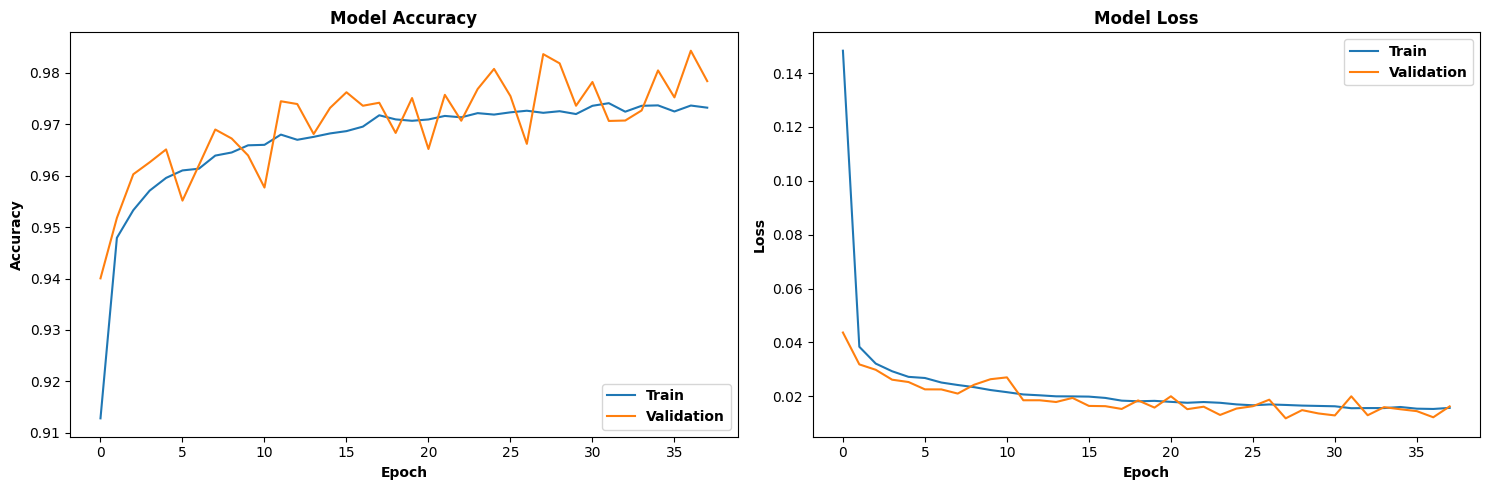

In [92]:
plot_training_history(history_ann_adam_SinusoidalRandom)

In [93]:
ann_adamw_SinusoidalRandom = ann(optimizer='adamw')
ann_adamw_SinusoidalRandom.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_136 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history_ann_adamw_SinusoidalRandom = ann_adamw_SinusoidalRandom.fit(x_train_SinusoidalRandom, y_train_SinusoidalRandom, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8322 - loss: 0.6471 - val_accuracy: 0.9217 - val_loss: 0.0648
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9306 - loss: 0.0568 - val_accuracy: 0.9461 - val_loss: 0.0443
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9469 - loss: 0.0411 - val_accuracy: 0.9515 - val_loss: 0.0346
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9529 - loss: 0.0348 - val_accuracy: 0.9554 - val_loss: 0.0342
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9539 - loss: 0.0310 - val_accuracy: 0.9572 - val_loss: 0.0295
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9554 - loss: 0.0283 - val_accuracy: 0.9591 - val_loss: 0.0253
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9561 - loss: 0.0261 - val_accuracy: 0.9583 - val_loss: 0.0251
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9559 - los

In [95]:
test_loss_ann_adamw_SinusoidalRandom, test_acc_ann_adamw_SinusoidalRandom = ann_adamw_SinusoidalRandom.evaluate(x_test_SinusoidalRandom, y_test_SinusoidalRandom)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_SinusoidalRandom)
print('Testing Accuracy :', test_acc_ann_adamw_SinusoidalRandom)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9739 - loss: 0.0105
Testing the Model :
Testing Loss : 0.010708043351769447
Testing Accuracy : 0.9733999967575073


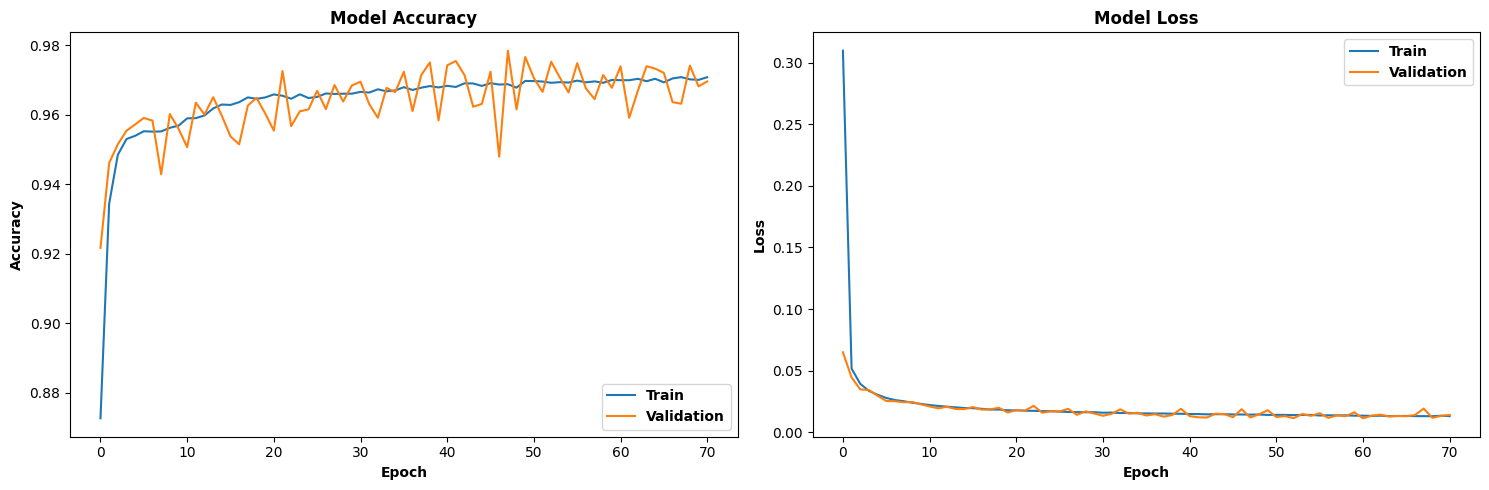

In [96]:
plot_training_history(history_ann_adamw_SinusoidalRandom)

In [97]:
ann_adadelta_SinusoidalRandom = ann(optimizer='adadelta')
ann_adadelta_SinusoidalRandom.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
history_ann_adadelta_SinusoidalRandom = ann_adadelta_SinusoidalRandom.fit(x_train_SinusoidalRandom, y_train_SinusoidalRandom, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8359 - loss: 0.5354 - val_accuracy: 0.9265 - val_loss: 0.0622
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9341 - loss: 0.0550 - val_accuracy: 0.9457 - val_loss: 0.0455
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9505 - loss: 0.0385 - val_accuracy: 0.9510 - val_loss: 0.0356
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9564 - loss: 0.0317 - val_accuracy: 0.9609 - val_loss: 0.0286
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9596 - loss: 0.0285 - val_accuracy: 0.9636 - val_loss: 0.0258
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9626 - loss: 0.0269 - val_accuracy: 0.9680 - val_loss: 0.0239
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9664 - loss: 0.0251 - val_accuracy: 0.9674 - val_loss: 0.0265
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9679 - loss

In [99]:
test_loss_ann_adadelta_SinusoidalRandom, test_acc_ann_adadelta_SinusoidalRandom = ann_adadelta_SinusoidalRandom.evaluate(x_test_SinusoidalRandom, y_test_SinusoidalRandom)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_SinusoidalRandom)
print('Testing Accuracy :', test_acc_ann_adadelta_SinusoidalRandom)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9755 - loss: 0.0117
Testing the Model :
Testing Loss : 0.011814168654382229
Testing Accuracy : 0.9757333397865295


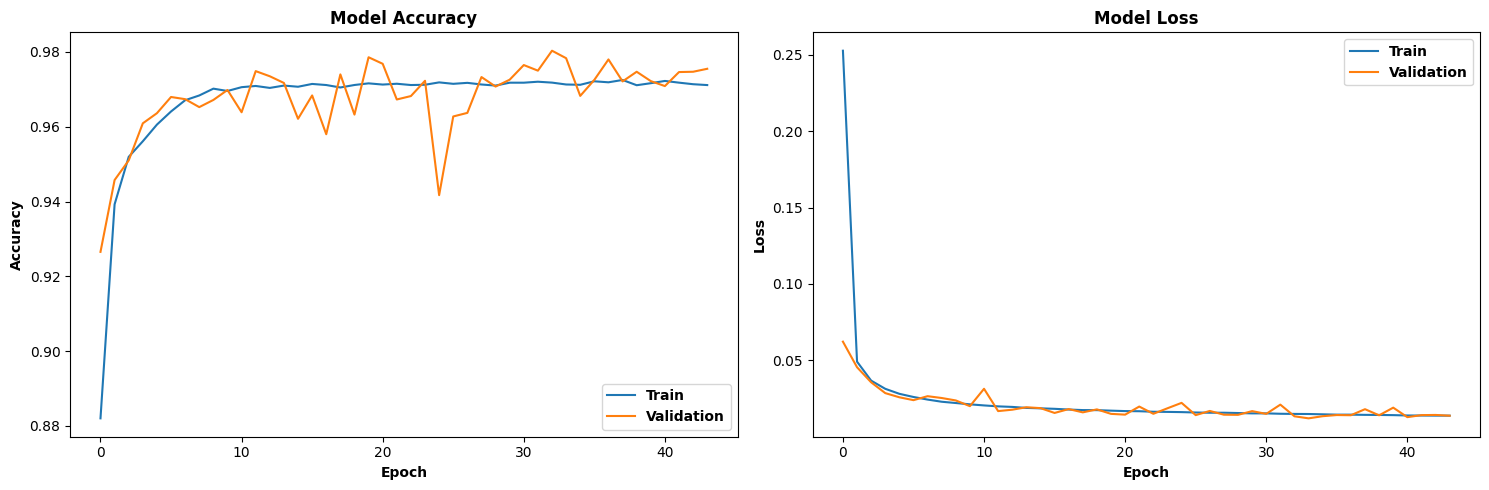

In [100]:
plot_training_history(history_ann_adadelta_SinusoidalRandom)

In [101]:
ann_adagrad_SinusoidalRandom = ann(optimizer='adagrad')
ann_adagrad_SinusoidalRandom.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
history_ann_adagrad_SinusoidalRandom = ann_adagrad_SinusoidalRandom.fit(x_train_SinusoidalRandom, y_train_SinusoidalRandom, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8576 - loss: 0.3963 - val_accuracy: 0.9273 - val_loss: 0.0716
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9371 - loss: 0.0519 - val_accuracy: 0.9519 - val_loss: 0.0391
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9548 - loss: 0.0349 - val_accuracy: 0.9586 - val_loss: 0.0335
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9642 - loss: 0.0276 - val_accuracy: 0.9574 - val_loss: 0.0276
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9659 - loss: 0.0245 - val_accuracy: 0.9669 - val_loss: 0.0227
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9677 - loss: 0.0219 - val_accuracy: 0.9695 - val_loss: 0.0202
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9685 - loss: 0.0206 - val_accuracy: 0.9654 - val_loss: 0.0190
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9701 - los

In [103]:
test_loss_ann_adagrad_SinusoidalRandom, test_acc_ann_adagrad_SinusoidalRandom = ann_adagrad_SinusoidalRandom.evaluate(x_test_SinusoidalRandom, y_test_SinusoidalRandom)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_SinusoidalRandom)
print('Testing Accuracy :', test_acc_ann_adagrad_SinusoidalRandom)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9830 - loss: 0.0062
Testing the Model :
Testing Loss : 0.006239845417439938
Testing Accuracy : 0.9819666743278503


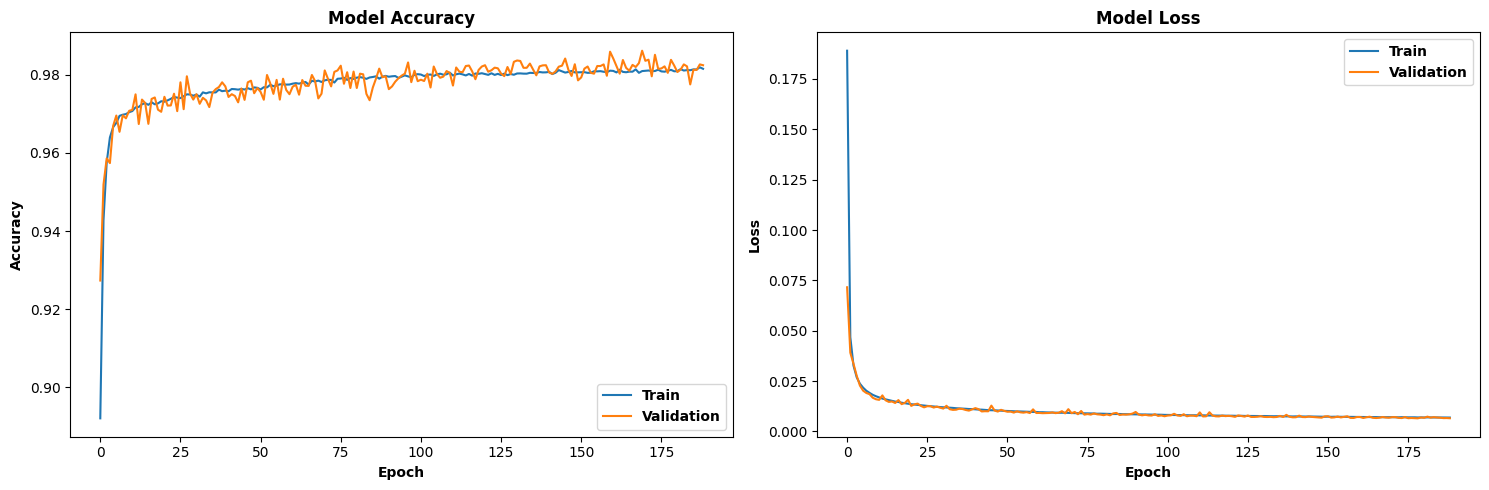

In [104]:
plot_training_history(history_ann_adagrad_SinusoidalRandom)

In [105]:
ann_rmsprop_SinusoidalRandom = ann(optimizer='rmsprop')
ann_rmsprop_SinusoidalRandom.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_148 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_150 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
history_ann_rmsprop_SinusoidalRandom = ann_rmsprop_SinusoidalRandom.fit(x_train_SinusoidalRandom, y_train_SinusoidalRandom, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7960 - loss: 1.0070 - val_accuracy: 0.8577 - val_loss: 0.3818
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8598 - loss: 0.2843 - val_accuracy: 0.9136 - val_loss: 0.1274
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9147 - loss: 0.1091 - val_accuracy: 0.9192 - val_loss: 0.0779
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9175 - loss: 0.0744 - val_accuracy: 0.9234 - val_loss: 0.0610
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9245 - loss: 0.0587 - val_accuracy: 0.9309 - val_loss: 0.0518
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9331 - loss: 0.0496 - val_accuracy: 0.9399 - val_loss: 0.0439
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9403 - loss: 0.0431 - val_accuracy: 0.9422 - val_loss: 0.0438
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9458 - loss:

In [107]:
test_loss_ann_rmsprop_SinusoidalRandom, test_acc_ann_rmsprop_SinusoidalRandom = ann_rmsprop_SinusoidalRandom.evaluate(x_test_SinusoidalRandom, y_test_SinusoidalRandom)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_SinusoidalRandom)
print('Testing Accuracy :', test_acc_ann_rmsprop_SinusoidalRandom)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9724 - loss: 0.0128
Testing the Model :
Testing Loss : 0.012801405042409897
Testing Accuracy : 0.971833348274231


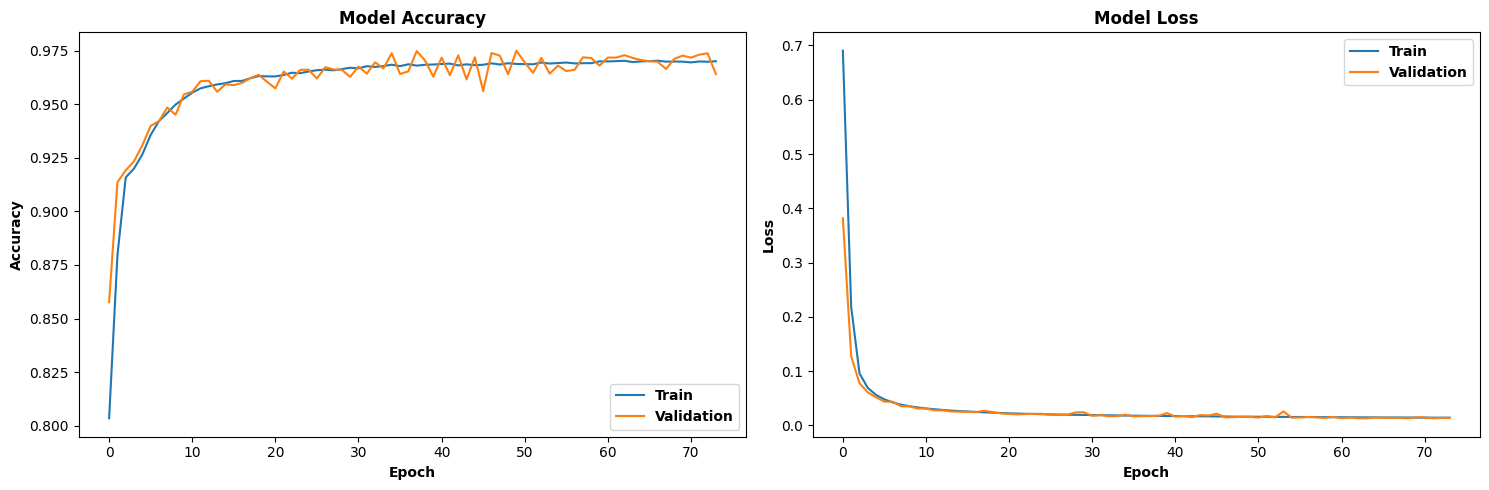

In [108]:
plot_training_history(history_ann_rmsprop_SinusoidalRandom)

In [109]:
ann_sgd_SinusoidalRandom = ann(optimizer='sgd')
ann_sgd_SinusoidalRandom.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_152 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
history_ann_sgd_SinusoidalRandom = ann_sgd_SinusoidalRandom.fit(x_train_SinusoidalRandom, y_train_SinusoidalRandom, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7926 - loss: 0.8534 - val_accuracy: 0.8042 - val_loss: 0.5941
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8141 - loss: 0.5323 - val_accuracy: 0.8764 - val_loss: 0.2603
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8846 - loss: 0.2043 - val_accuracy: 0.8931 - val_loss: 0.1161
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8895 - loss: 0.1080 - val_accuracy: 0.8998 - val_loss: 0.0929
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8968 - loss: 0.0901 - val_accuracy: 0.9024 - val_loss: 0.0817
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8997 - loss: 0.0815 - val_accuracy: 0.8945 - val_loss: 0.0756
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9024 - loss: 0.0750 - val_accuracy: 0.9062 - val_loss: 0.0679
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9069 - loss:

In [111]:
test_loss_ann_sgd_SinusoidalRandom, test_acc_ann_sgd_SinusoidalRandom = ann_sgd_SinusoidalRandom.evaluate(x_test_SinusoidalRandom, y_test_SinusoidalRandom)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_SinusoidalRandom)
print('Testing Accuracy :', test_acc_ann_sgd_SinusoidalRandom)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9662 - loss: 0.0201
Testing the Model :
Testing Loss : 0.020500188693404198
Testing Accuracy : 0.9664666652679443


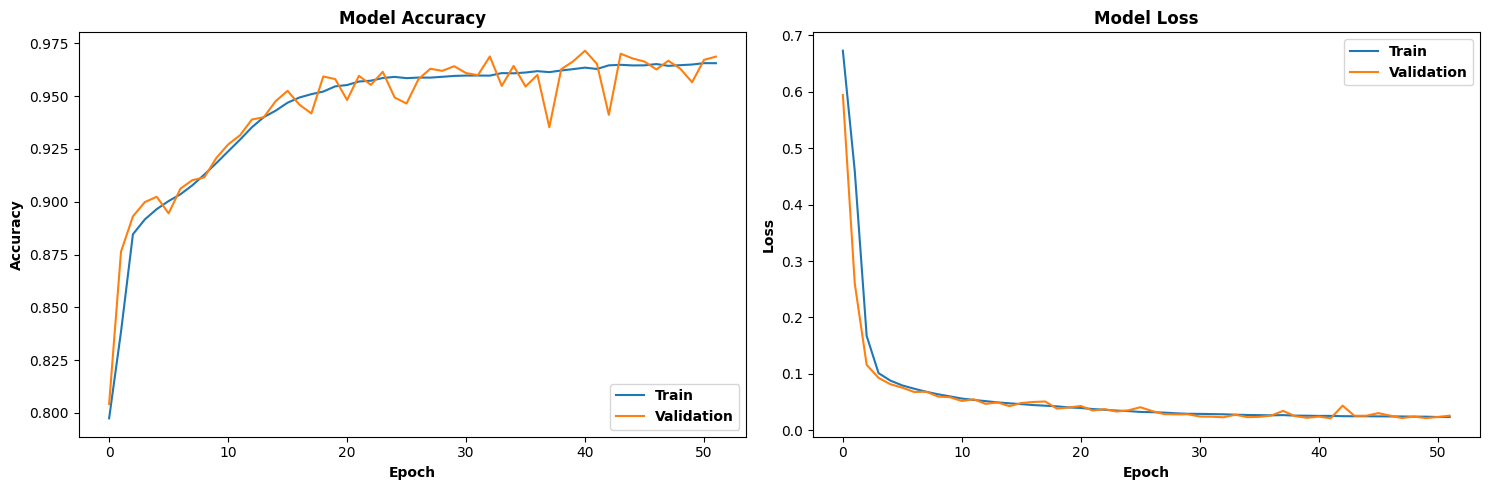

In [112]:
plot_training_history(history_ann_sgd_SinusoidalRandom)

Hybrid

In [113]:
data_RandomFixedSinusoidal = pd.read_csv('Three Link_RandomFixedSinusoidal.csv')

x_RandomFixedSinusoidal = data_RandomFixedSinusoidal.iloc[:, 0:3].values
y_RandomFixedSinusoidal = data_RandomFixedSinusoidal.iloc[:, 3:].values
x_train_RandomFixedSinusoidal, x_test_RandomFixedSinusoidal, y_train_RandomFixedSinusoidal, y_test_RandomFixedSinusoidal = train_test_split(x_RandomFixedSinusoidal, y_RandomFixedSinusoidal, test_size = 0.20)

In [114]:
ann_adam_RandomFixedSinusoidal = ann(optimizer='adam')
ann_adam_RandomFixedSinusoidal.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
history_ann_adam_RandomFixedSinusoidal = ann_adam_RandomFixedSinusoidal.fit(x_train_RandomFixedSinusoidal, y_train_RandomFixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping], shuffle=True)

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8740 - loss: 0.4195 - val_accuracy: 0.9462 - val_loss: 0.0450
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9519 - loss: 0.0434 - val_accuracy: 0.9622 - val_loss: 0.0359
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9557 - loss: 0.0363 - val_accuracy: 0.9602 - val_loss: 0.0340
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9588 - loss: 0.0319 - val_accuracy: 0.9613 - val_loss: 0.0305
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9602 - loss: 0.0299 - val_accuracy: 0.9602 - val_loss: 0.0295
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9615 - loss: 0.0275 - val_accuracy: 0.9554 - val_loss: 0.0347
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9595 - loss: 0.0271 - val_accuracy: 0.9622 - val_loss: 0.0288
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9637 - loss: 0

In [116]:
test_loss_ann_adam_RandomFixedSinusoidal, test_acc_ann_adam_RandomFixedSinusoidal = ann_adam_RandomFixedSinusoidal.evaluate(x_test_RandomFixedSinusoidal, y_test_RandomFixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adam_RandomFixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adam_RandomFixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9705 - loss: 0.0147
Testing the Model :
Testing Loss : 0.014732394367456436
Testing Accuracy : 0.9698333144187927


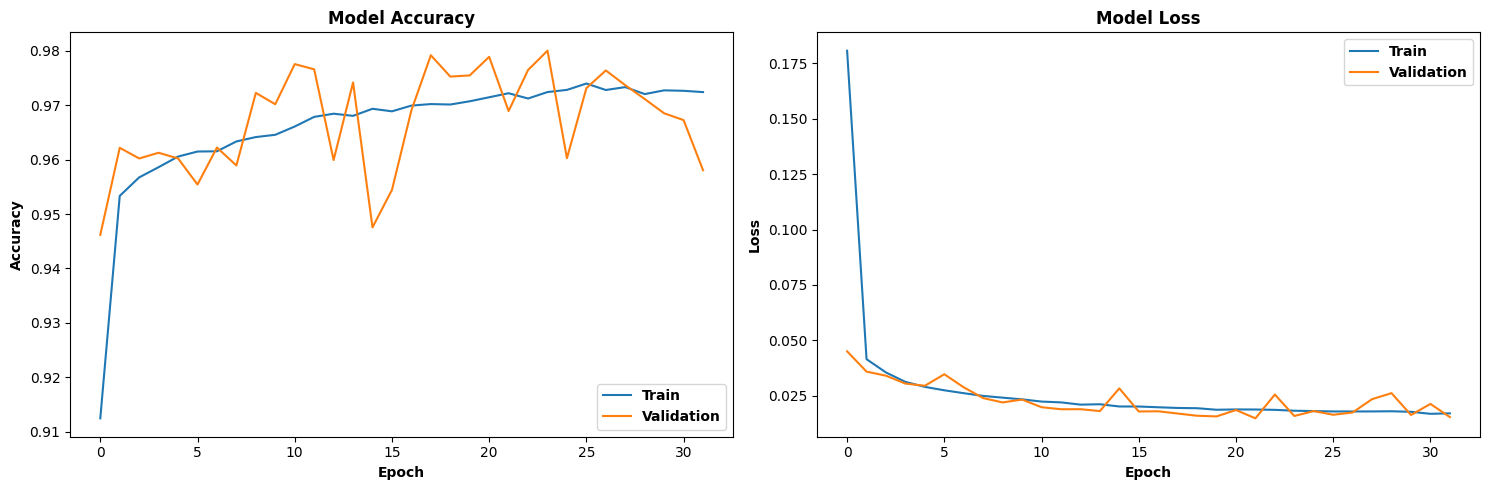

In [117]:
plot_training_history(history_ann_adam_RandomFixedSinusoidal)

In [118]:
ann_adamw_RandomFixedSinusoidal = ann(optimizer='adamw')
ann_adamw_RandomFixedSinusoidal.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_160 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
history_ann_adamw_RandomFixedSinusoidal = ann_adamw_RandomFixedSinusoidal.fit(x_train_RandomFixedSinusoidal, y_train_RandomFixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8542 - loss: 0.6537 - val_accuracy: 0.9263 - val_loss: 0.0761
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9310 - loss: 0.0621 - val_accuracy: 0.9411 - val_loss: 0.0438
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9505 - loss: 0.0398 - val_accuracy: 0.9489 - val_loss: 0.0386
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9572 - loss: 0.0339 - val_accuracy: 0.9534 - val_loss: 0.0314
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9612 - loss: 0.0302 - val_accuracy: 0.9658 - val_loss: 0.0282
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9616 - loss: 0.0275 - val_accuracy: 0.9657 - val_loss: 0.0247
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9625 - loss: 0.0255 - val_accuracy: 0.9663 - val_loss: 0.0280
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9632 - l

In [120]:
test_loss_ann_adamw_RandomFixedSinusoidal, test_acc_ann_adamw_RandomFixedSinusoidal = ann_adamw_RandomFixedSinusoidal.evaluate(x_test_RandomFixedSinusoidal, y_test_RandomFixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adamw_RandomFixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adamw_RandomFixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9774 - loss: 0.0119
Testing the Model :
Testing Loss : 0.011811974458396435
Testing Accuracy : 0.9779000282287598


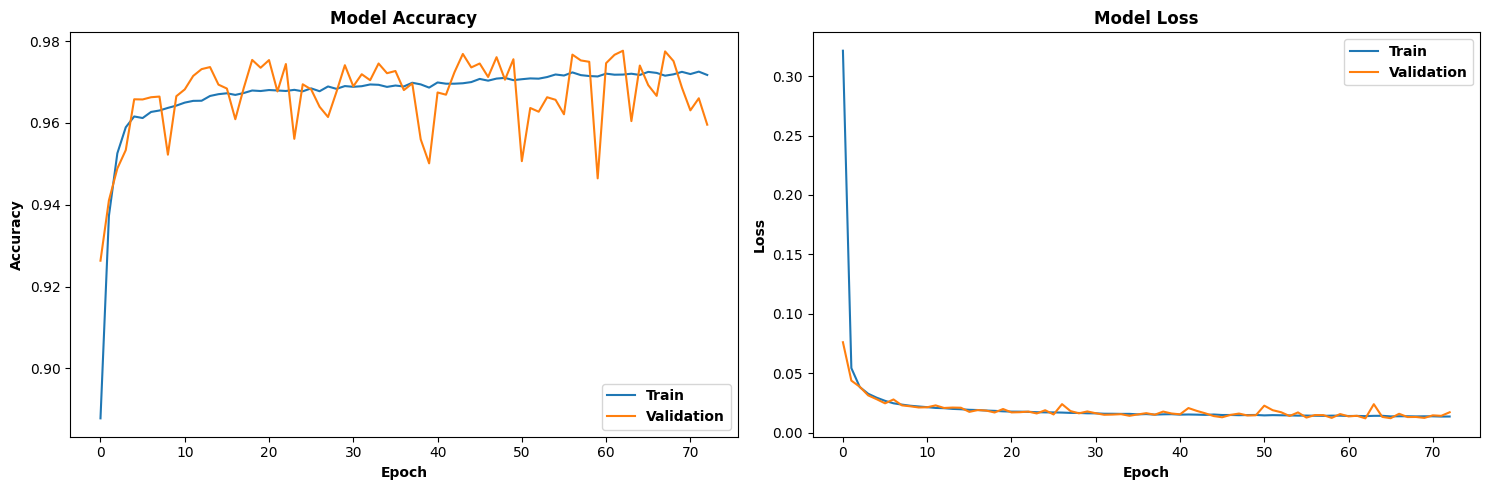

In [121]:
plot_training_history(history_ann_adamw_RandomFixedSinusoidal)

In [122]:
ann_adadelta_RandomFixedSinusoidal = ann(optimizer='adadelta')
ann_adadelta_RandomFixedSinusoidal.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_164 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
history_ann_adadelta_RandomFixedSinusoidal = ann_adadelta_RandomFixedSinusoidal.fit(x_train_RandomFixedSinusoidal, y_train_RandomFixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping], shuffle=True)

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8644 - loss: 0.5301 - val_accuracy: 0.9355 - val_loss: 0.0621
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9407 - loss: 0.0561 - val_accuracy: 0.9511 - val_loss: 0.0412
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9543 - loss: 0.0403 - val_accuracy: 0.9601 - val_loss: 0.0339
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9587 - loss: 0.0338 - val_accuracy: 0.9580 - val_loss: 0.0302
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9622 - loss: 0.0298 - val_accuracy: 0.9604 - val_loss: 0.0270
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9641 - loss: 0.0280 - val_accuracy: 0.9657 - val_loss: 0.0257
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9661 - loss: 0.0252 - val_accuracy: 0.9672 - val_loss: 0.0217
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9682 - loss: 0

In [124]:
test_loss_ann_adadelta_RandomFixedSinusoidal, test_acc_ann_adadelta_RandomFixedSinusoidal = ann_adadelta_RandomFixedSinusoidal.evaluate(x_test_RandomFixedSinusoidal, y_test_RandomFixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adadelta_RandomFixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adadelta_RandomFixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9784 - loss: 0.0094
Testing the Model :
Testing Loss : 0.009325592778623104
Testing Accuracy : 0.978766679763794


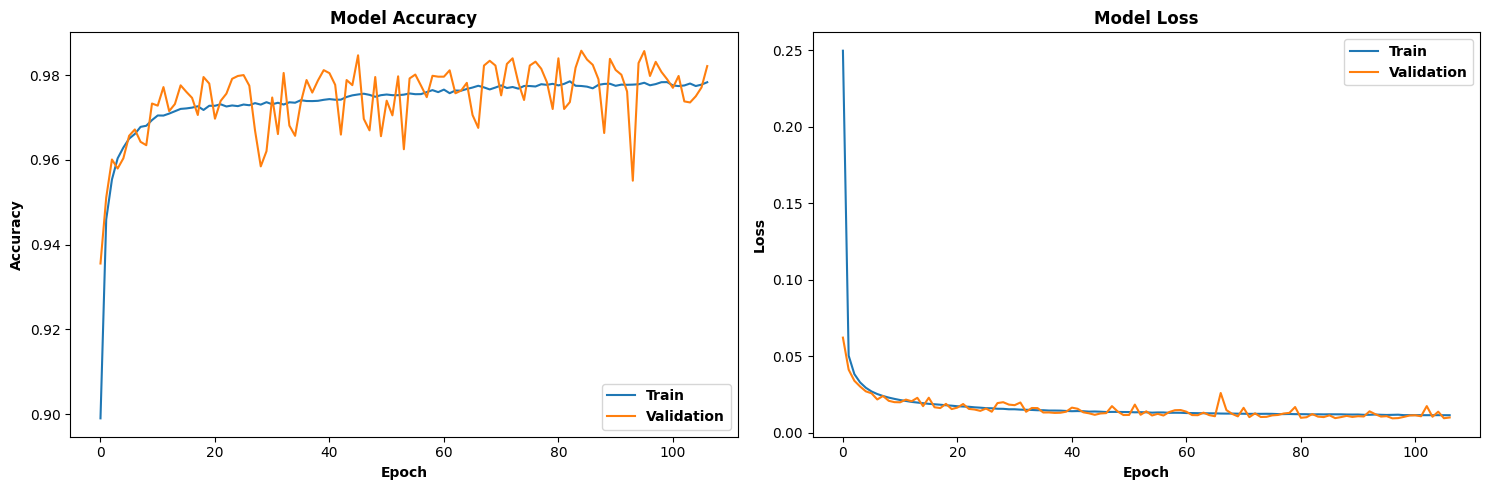

In [125]:
plot_training_history(history_ann_adadelta_RandomFixedSinusoidal)

In [126]:
ann_adagrad_RandomFixedSinusoidal = ann(optimizer='adagrad')
ann_adagrad_RandomFixedSinusoidal.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
history_ann_adagrad_RandomFixedSinusoidal = ann_adagrad_RandomFixedSinusoidal.fit(x_train_RandomFixedSinusoidal, y_train_RandomFixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping], shuffle=True)

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8652 - loss: 0.4308 - val_accuracy: 0.9365 - val_loss: 0.0563
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9442 - loss: 0.0509 - val_accuracy: 0.9530 - val_loss: 0.0463
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9585 - loss: 0.0360 - val_accuracy: 0.9631 - val_loss: 0.0308
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9653 - loss: 0.0289 - val_accuracy: 0.9700 - val_loss: 0.0259
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9686 - loss: 0.0250 - val_accuracy: 0.9724 - val_loss: 0.0268
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9706 - loss: 0.0231 - val_accuracy: 0.9705 - val_loss: 0.0235
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9723 - loss: 0.0220 - val_accuracy: 0.9657 - val_loss: 0.0219
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9711 - los

In [128]:
test_loss_ann_adagrad_RandomFixedSinusoidal, test_acc_ann_adagrad_RandomFixedSinusoidal = ann_adagrad_RandomFixedSinusoidal.evaluate(x_test_RandomFixedSinusoidal, y_test_RandomFixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_adagrad_RandomFixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_adagrad_RandomFixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0083
Testing the Model :
Testing Loss : 0.008185143582522869
Testing Accuracy : 0.9818999767303467


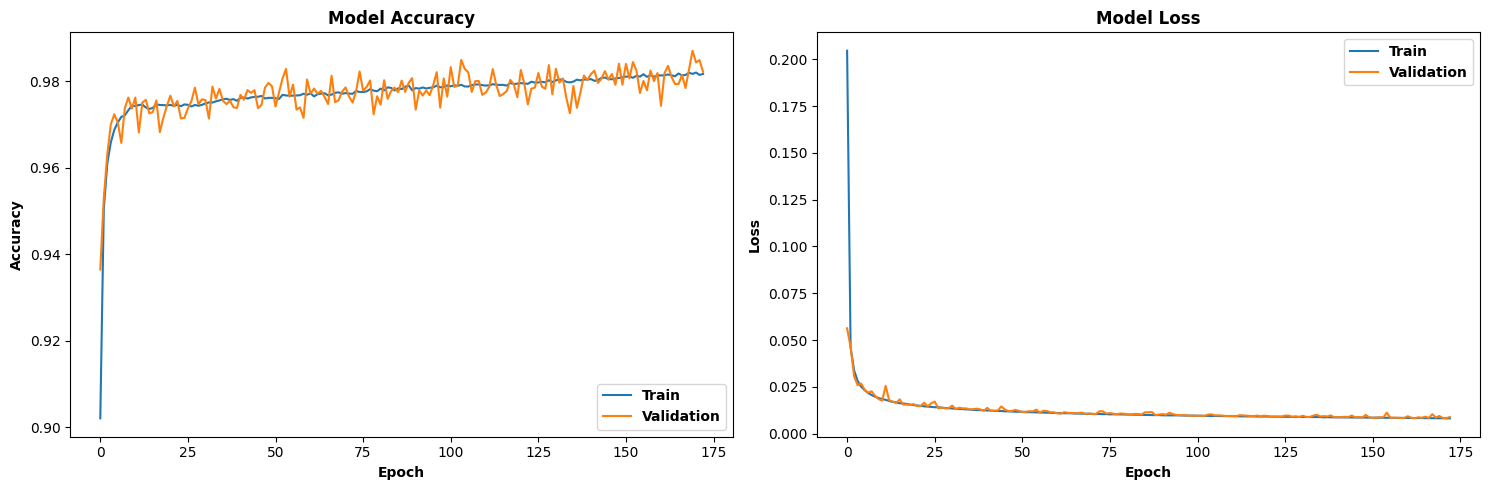

In [129]:
plot_training_history(history_ann_adagrad_RandomFixedSinusoidal)

In [130]:
ann_rmsprop_RandomFixedSinusoidal = ann(optimizer='rmsprop')
ann_rmsprop_RandomFixedSinusoidal.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_172 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_174 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
history_ann_rmsprop_RandomFixedSinusoidal = ann_rmsprop_RandomFixedSinusoidal.fit(x_train_RandomFixedSinusoidal, y_train_RandomFixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping], shuffle=True)

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8226 - loss: 1.0482 - val_accuracy: 0.8255 - val_loss: 0.4174
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8602 - loss: 0.3507 - val_accuracy: 0.9255 - val_loss: 0.1436
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9318 - loss: 0.1222 - val_accuracy: 0.9288 - val_loss: 0.0838
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9337 - loss: 0.0730 - val_accuracy: 0.9388 - val_loss: 0.0589
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9396 - loss: 0.0556 - val_accuracy: 0.9454 - val_loss: 0.0494
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9467 - loss: 0.0459 - val_accuracy: 0.9529 - val_loss: 0.0421
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9512 - loss: 0.0405 - val_accuracy: 0.9556 - val_loss: 0.0389
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9551 - los

In [132]:
test_loss_ann_rmsprop_RandomFixedSinusoidal, test_acc_ann_rmsprop_RandomFixedSinusoidal = ann_rmsprop_RandomFixedSinusoidal.evaluate(x_test_RandomFixedSinusoidal, y_test_RandomFixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_rmsprop_RandomFixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_rmsprop_RandomFixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9778 - loss: 0.0116
Testing the Model :
Testing Loss : 0.01142139919102192
Testing Accuracy : 0.9782333374023438


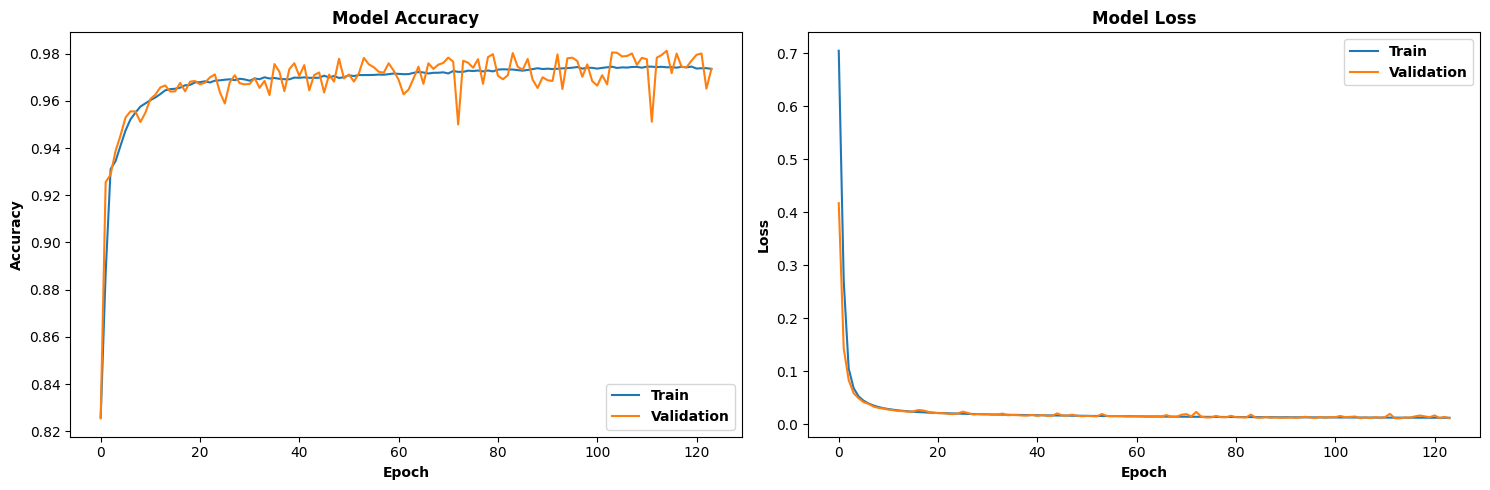

In [133]:
plot_training_history(history_ann_rmsprop_RandomFixedSinusoidal)

In [134]:
ann_sgd_RandomFixedSinusoidal = ann(optimizer='sgd')
ann_sgd_RandomFixedSinusoidal.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_176 (Dense)                    │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,815 (42.25 KB)

 Trainable params: 10,815 (42.25 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
history_ann_sgd_RandomFixedSinusoidal = ann_sgd_RandomFixedSinusoidal.fit(x_train_RandomFixedSinusoidal, y_train_RandomFixedSinusoidal, epochs = 200, validation_split = 0.2, callbacks=[early_stopping], shuffle=True)

Epoch 1/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8277 - loss: 0.8371 - val_accuracy: 0.8723 - val_loss: 0.4803
Epoch 2/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8786 - loss: 0.4350 - val_accuracy: 0.8692 - val_loss: 0.3648
Epoch 3/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8805 - loss: 0.2453 - val_accuracy: 0.8915 - val_loss: 0.1041
Epoch 4/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9001 - loss: 0.0984 - val_accuracy: 0.9107 - val_loss: 0.0870
Epoch 5/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9077 - loss: 0.0842 - val_accuracy: 0.9061 - val_loss: 0.0818
Epoch 6/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9110 - loss: 0.0774 - val_accuracy: 0.9115 - val_loss: 0.0717
Epoch 7/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9133 - loss: 0.0712 - val_accuracy: 0.9107 - val_loss: 0.0695
Epoch 8/200
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9195 - loss

In [136]:
test_loss_ann_sgd_RandomFixedSinusoidal, test_acc_ann_sgd_RandomFixedSinusoidal = ann_sgd_RandomFixedSinusoidal.evaluate(x_test_RandomFixedSinusoidal, y_test_RandomFixedSinusoidal)
print('Testing the Model :')
print('Testing Loss :', test_loss_ann_sgd_RandomFixedSinusoidal)
print('Testing Accuracy :', test_acc_ann_sgd_RandomFixedSinusoidal)

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9663 - loss: 0.0218
Testing the Model :
Testing Loss : 0.021780958399176598
Testing Accuracy : 0.9652000069618225


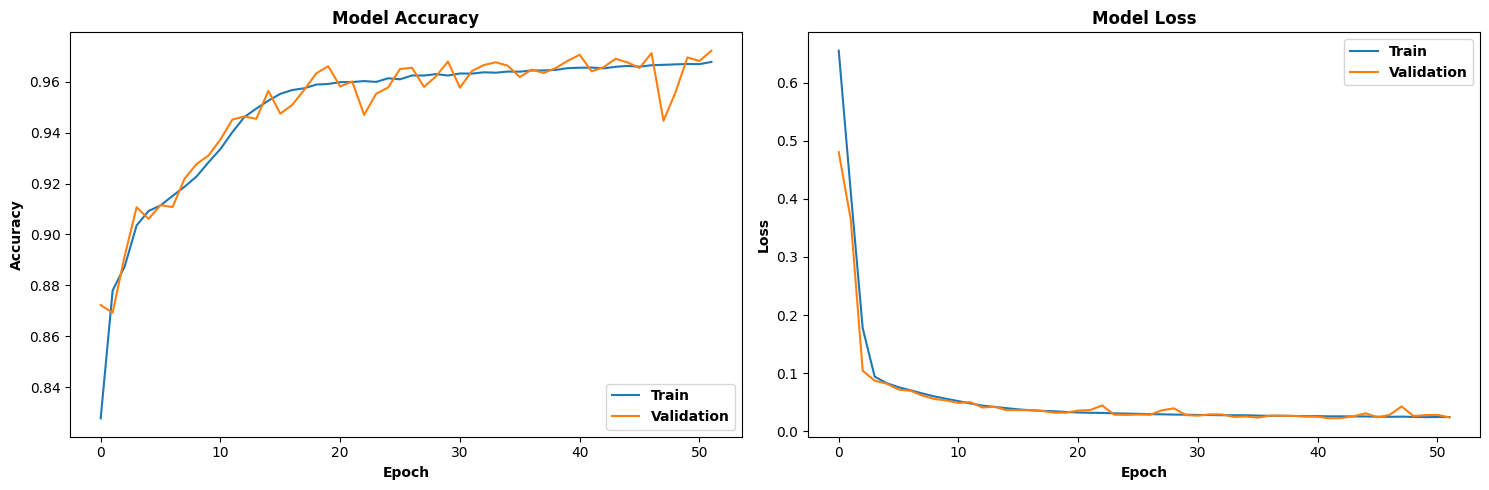

In [137]:
plot_training_history(history_ann_sgd_RandomFixedSinusoidal)

Results

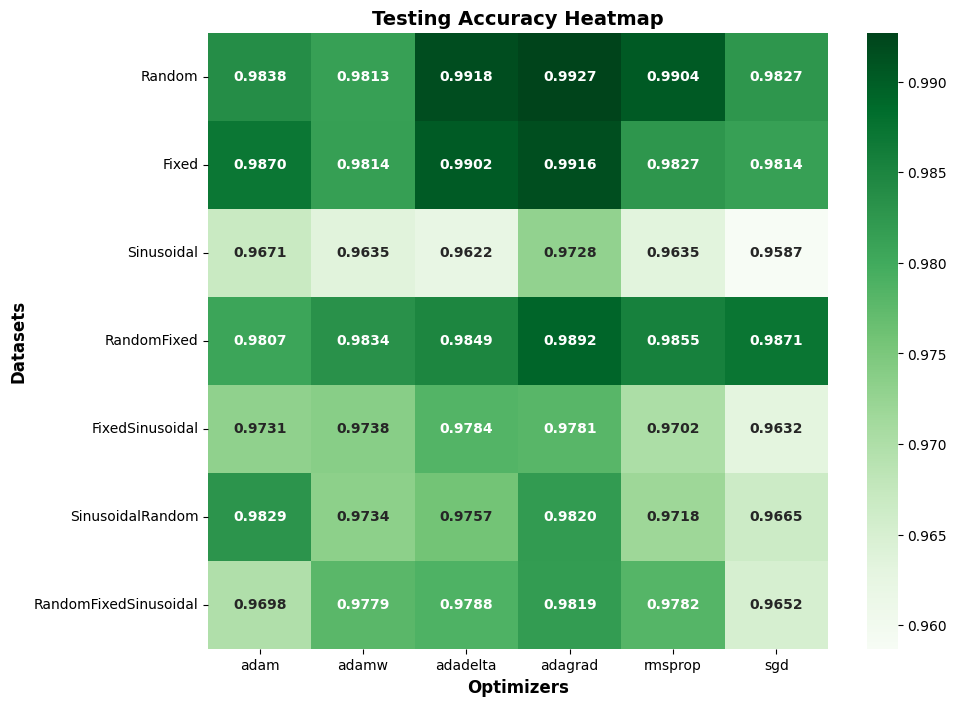

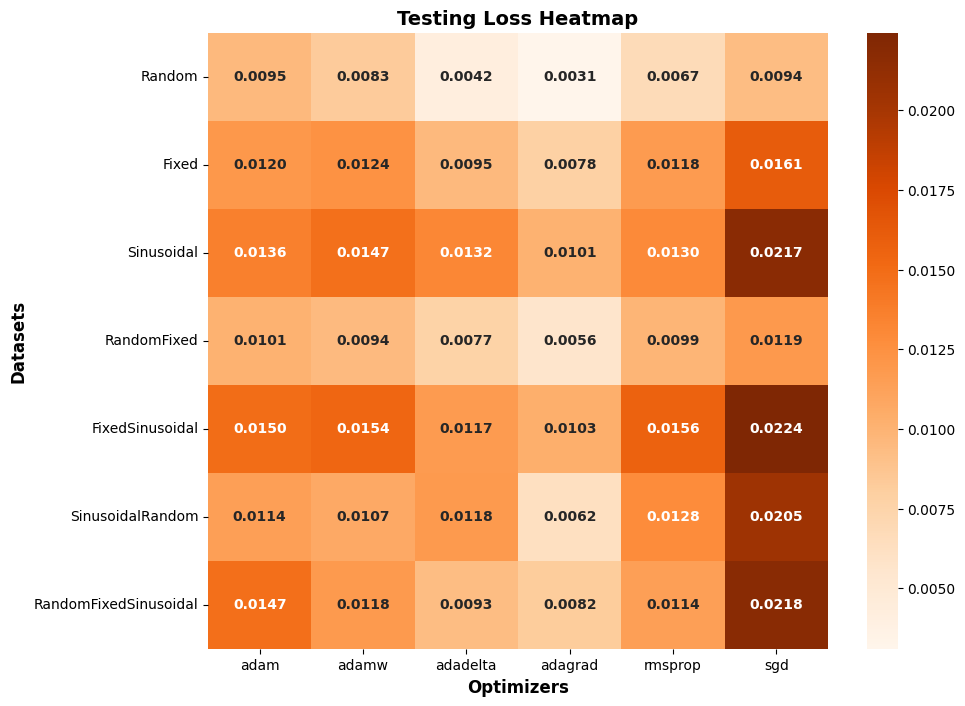

In [143]:
datasets = ["Random", "Fixed", "Sinusoidal", "RandomFixed", "FixedSinusoidal", "SinusoidalRandom", "RandomFixedSinusoidal"]
optimizers = ["adam", "adamw", "adadelta", "adagrad", "rmsprop", "sgd"]

accuracy_matrix = np.array([[globals()[f"test_acc_ann_{opt}_{ds}"] for opt in optimizers] for ds in datasets])
loss_matrix = np.array([[globals()[f"test_loss_ann_{opt}_{ds}"] for opt in optimizers] for ds in datasets])

def plot_heatmap(matrix, title, cmap, xlabel, ylabel, annot_format=".4f"):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        matrix, annot=True, fmt=annot_format, cmap=cmap,
        xticklabels=optimizers, yticklabels=datasets,
        annot_kws={"weight": "bold"}
    )
    plt.xlabel(xlabel, fontsize=12, fontweight="bold")
    plt.ylabel(ylabel, fontsize=12, fontweight="bold")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.show()

plot_heatmap(accuracy_matrix, "Testing Accuracy Heatmap", cmap="Greens", xlabel="Optimizers", ylabel="Datasets")

plot_heatmap(loss_matrix, "Testing Loss Heatmap", cmap="Oranges", xlabel="Optimizers", ylabel="Datasets")